# **Online Payment Fraud Detection with Machine Learning**

In the modern digital era, online payments have become an indispensable part of daily life, enabling seamless transactions with a simple click or tap. From e-commerce purchases to peer-to-peer transfers, online payments offer unparalleled convenience. However, with this convenience comes a growing risk: **fraudulent transactions**. Fraudsters continuously exploit vulnerabilities in payment systems, leading to significant financial losses for businesses and individuals. As the volume of online payments increases, so does the urgency to develop reliable fraud detection systems.

This notebook focuses on building a **machine learning model** to detect **fraudulent online payment transactions**. By analyzing historical transaction data, the goal is to create a model capable of classifying transactions as legitimate or fraudulent with high accuracy. The dataset used in this notebook, sourced from **Kaggle**, contains transaction details that will help identify patterns indicative of fraudulent activities.

### **Why Fraud Detection?**
Fraud detection in online payments is crucial for:
- **Preventing Financial Losses**: Identifying fraudulent transactions quickly can save businesses millions.
- **Protecting Users**: Safeguarding customers from unauthorized transactions, maintaining trust and security.
- **Compliance**: Many industries are required by law to implement fraud detection systems to avoid financial penalties and ensure security standards.

## **Dataset Overview**
The dataset contains detailed information about transactions, with various attributes that help understand the nature and context of each transaction. These features will be explored to identify patterns and relationships that could help in fraud detection.

### Key Features:
- **step**: The time (in hours) since the recording began. This provides a temporal dimension to the transaction data.
- **type**: The type of transaction (e.g., `PAYMENT`, `TRANSFER`, `CASHOUT`). Different transaction types might have varying fraud risk levels.
- **amount**: The monetary value of the transaction. Fraudulent activities often involve unusual amounts that deviate from typical transaction patterns.
- **nameOrig**: The identifier for the originator or customer initiating the transaction. This attribute can help trace patterns in user behavior.
- **oldbalanceOrg**: The balance of the originating account before the transaction.
- **newbalanceOrig**: The balance of the originating account after the transaction. This can help track transaction changes and abnormal behaviors.
- **nameDest**: The identifier of the destination account. Tracking destination patterns can be useful for detecting suspicious transactions.
- **oldbalanceDest**: The balance of the destination account before the transaction.
- **newbalanceDest**: The balance of the destination account after the transaction.
- **isFraud**: The target variable indicating whether the transaction was fraudulent (1) or not (0). This is the class label we are aiming to predict.

### **Objective**
The primary goal of this notebook is to:
1. **Explore the dataset** to understand its structure, distribution of features, and potential issues such as missing data or outliers.
2. **Preprocess the data** to clean and prepare it for modeling. This includes handling missing values, encoding categorical variables, scaling numerical features, and addressing class imbalance.
3. **Build a machine learning model** that can accurately classify transactions as fraudulent or non-fraudulent. Various algorithms will be explored, and the most suitable model will be selected based on performance metrics such as accuracy, precision, recall, and F1-score.
4. **Evaluate the model** using appropriate metrics, including the confusion matrix and classification report, to assess its performance on unseen test data.

The steps involved will include:
- **Data Exploration & Visualization**: Analyzing the distribution of features and identifying any correlations between variables.
- **Feature Engineering**: Creating new features or transforming existing ones to improve model performance.
- **Model Training & Evaluation**: Training multiple machine learning models, tuning hyperparameters, and evaluating their effectiveness.
- **Handling Class Imbalance**: Since fraudulent transactions are rare (highly imbalanced dataset), techniques like SMOTE (Synthetic Minority Over-sampling Technique) and class weighting will be used to address this issue.

This notebook aims to provide a comprehensive approach to solving the problem of fraud detection in online payments, using machine learning to enhance the accuracy and efficiency of identifying fraudulent transactions in real-time systems.

# References
* https://www.kaggle.com/code/kavya2099/online-payment-fraud-detection-eda
* https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
* analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
* https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/
* https://jovian.ai/aakashns-6l3/us-accidents-analysis
* https://thinkingneuron.com/how-to-visualize-the-relationship-between-two-categorical-variables-in-python/

## **Library Imports**

For this project, we utilize two essential Python libraries:

- **NumPy**: A powerful library for numerical computations, particularly useful for handling multi-dimensional arrays and performing mathematical operations efficiently.

- **Pandas**: A versatile library designed for data manipulation and analysis. It simplifies tasks such as reading datasets, cleaning data, and exploring relationships within the data.

In [2]:
import numpy as np
import pandas as pd

These libraries are fundamental for working with structured datasets and performing the necessary data processing steps required for machine learning.

## **Loading the Dataset**

The dataset used for this project is loaded using the **Pandas** library. The `pd.read_csv()` function reads the data from a CSV file named `onlinefraud.csv` and stores it in a DataFrame called `df`.

A **DataFrame** is a two-dimensional data structure in Pandas, similar to a table in a database or a spreadsheet, and is ideal for data manipulation and analysis. This step is essential for accessing the data and preparing it for further exploration and processing.

In [3]:
df = pd.read_csv('onlinefraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## **Previewing the Dataset**

To quickly examine the structure and content of the dataset, we use the `head()` method. This function displays the first five rows of the DataFrame by default, providing a snapshot of the dataset's columns, data types, and sample values.

This step is crucial for verifying that the data has been loaded correctly and for gaining an initial understanding of its structure and characteristics.

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## **Checking the Dataset Dimensions**

The `shape` attribute of a DataFrame provides the dimensions of the dataset as a tuple: `(number of rows, number of columns)`.

This information is useful for understanding the size of the dataset, helping to determine the volume of data available for analysis and the number of features or variables included.

In [5]:
df.shape

(6362620, 11)

## **Dataset Overview**

The `info()` method provides a concise summary of the dataset, including:

- The number of non-null entries in each column.
- The data types of each column.
- The overall memory usage of the DataFrame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


This function is essential for understanding the dataset's structure, identifying missing values, and ensuring the data types are appropriate for further analysis.

## **Statistical Summary of the Dataset**

The `describe()` method generates a statistical summary of the numerical columns in the dataset, including:

- **Count**: The number of non-missing values.
- **Mean**: The average value.
- **Standard Deviation (std)**: A measure of the spread or dispersion of the values.
- **Minimum (min)**: The smallest value.
- **25th, 50th, and 75th percentiles**: Values at these quartiles.
- **Maximum (max)**: The largest value.


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


This summary is valuable for understanding the distribution, range, and variability of the numerical data in the dataset.

## **Checking for Missing Values**

To identify missing data in the dataset, we use the `isnull()` method, which checks each entry for missing (null) values and returns a Boolean result. The `sum()` method then aggregates the total number of missing values in each column.


In [8]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


This step is crucial for identifying and addressing incomplete data, which can otherwise impact the accuracy and performance of the machine learning model.

## **Checking Value Distribution in Key Columns**

The `value_counts()` method is used to analyze the distribution of values in specific columns of the dataset. For example, it is applied to the following columns:

- **`nameOrig`**: The identifier of the customer initiating the transaction.
- **`nameDest`**: The identifier of the recipient of the transaction.
- **`type`**: The type of the transaction (e.g., cash-in, cash-out).
- **`isFlaggedFraud`**: A flag indicating whether the transaction was flagged as potentially fraudulent.
- **`isFraud`**: The target variable that indicates whether the transaction is truly fraudulent (1) or not (0).


In [9]:
df.nameOrig.value_counts()

,count
nameOrig,
C1902386530,3
C363736674,3
C545315117,3
C724452879,3
C1784010646,3
...,...
C98968405,1
C720209255,1
C1567523029,1


In [10]:
df.nameDest.value_counts()

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M1470027725,1
M1330329251,1
M1784358659,1


In [11]:
df.type.value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [12]:
df.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [13]:
df.isFraud.value_counts()

,count
isFraud,
0,6354407
1,8213


By using `value_counts()`, we can observe the frequency of different categories in each of these columns, providing insights into the dataset's structure and helping to identify any imbalances or notable patterns.

#Comprehensive Exploratory Data Analysis and Visualization

## **Visualizing Feature Distributions**

In this section, we use **Matplotlib** and **Seaborn**, two popular Python libraries for data visualization, to plot histograms for several key features in the dataset.

- **Matplotlib** (`plt`): Used for creating static, interactive, and animated visualizations.
- **Seaborn** (`sns`): Built on top of Matplotlib, Seaborn provides a high-level interface for creating attractive and informative statistical graphics.

The `%matplotlib inline` command ensures that the plots are displayed directly within the notebook.

We focus on the following features:
- `step`: Represents a unit of time in hours.
- `amount`: The transaction amount.
- `oldbalanceOrg`: The balance before the transaction from the originating account.
- `newbalanceOrig`: The balance after the transaction from the originating account.
- `oldbalanceDest`: The balance before the transaction in the destination account.
- `newbalanceDest`: The balance after the transaction in the destination account.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def showPlot(feature, bins=10, color='grey', figsize=(12, 6)):
    """
    Visualizes the distribution of a specific feature in the dataset with a histogram.

    Parameters:
    - feature (str): The column name for which the histogram will be plotted.
    - bins (int): The number of bins to be used in the histogram (default is 10).
    - color (str): The color of the bars in the histogram (default is 'grey').
    - figsize (tuple): The size of the figure (default is (12, 6)).

    Displays:
    - A histogram of the specified feature with additional context like legend, axis labels,
      and optional lines for mean/median.
    """

    # Set the plot size and style
    plt.figure(figsize=figsize)

    # Plot the histogram
    df[feature].plot(kind='hist', bins=bins, facecolor=color, edgecolor='black', alpha=0.7, label='Data Distribution')

    # Title and axis labels for better context
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(f'{feature} Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add a legend to the plot
    plt.legend(loc='upper right')

    # Calculate mean and median
    mean_value = df[feature].mean()
    median_value = df[feature].median()

    # Add lines for mean and median for better insight
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=3, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=3, label=f'Median: {median_value:.2f}')

    # Set the limits for x-axis to ensure the lines are visible
    plt.xlim(df[feature].min() - 0.1*(df[feature].max() - df[feature].min()),
             df[feature].max() + 0.1*(df[feature].max() - df[feature].min()))

    # Show grid for better readability
    plt.grid(True)

    # Show the plot
    plt.show()

## **Visualizing the 'step' Feature**

The **'step'** feature in this dataset represents a unit of time, with each step corresponding to one hour. This feature helps us understand the chronological progression of the transactions.

We use a histogram to visualize the distribution of this feature. **The histogram helps us identify patterns in the frequency of transactions over time, which can be useful for detecting trends or anomalies in transaction behavior.**

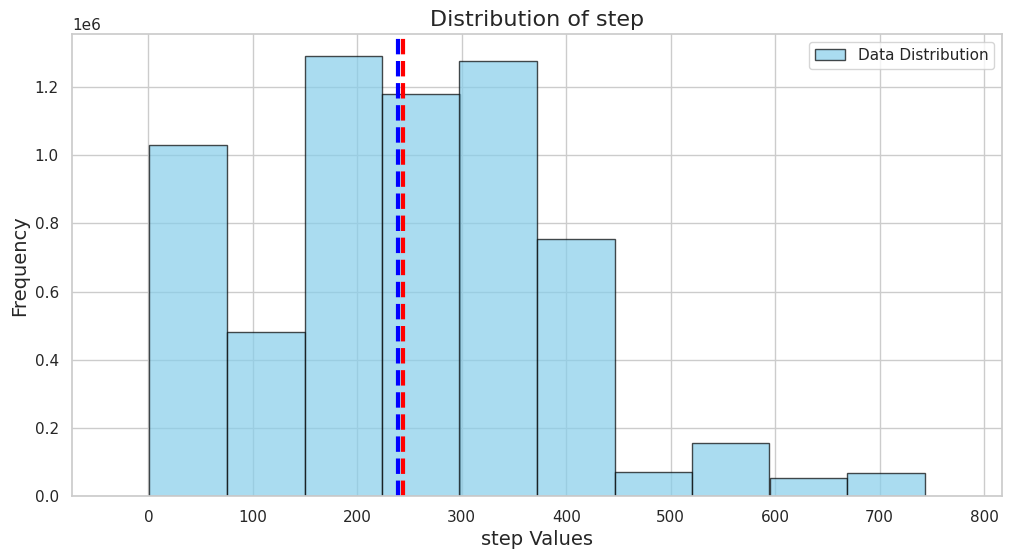

In [174]:
showPlot('step', bins=10, color='skyblue')

By analyzing the 'step' feature, we can see if there are certain time periods where transactions occur more frequently, which may indicate particular behavior or activity spikes.

## **Visualizing the 'amount' Feature**

The **'amount'** feature represents the monetary value of each transaction. This feature is key in understanding the financial scale of the transactions and identifying any anomalies or unusually large transactions that may indicate fraudulent activity.

We use a histogram to visualize the distribution of transaction amounts. **The histogram allows us to see how the transaction amounts are distributed across the dataset, helping to identify any trends, outliers, or spikes in transaction values.**


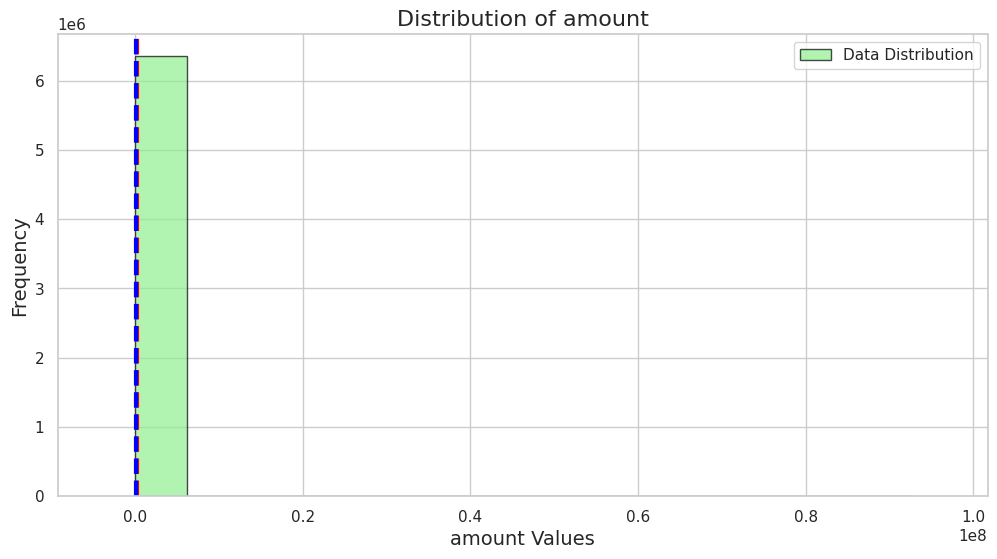

In [175]:
showPlot('amount', bins=15, color='lightgreen')

By analyzing the 'amount' feature, we can assess the typical transaction size and identify any transactions that deviate significantly from the norm, which might require further investigation.

## **Visualizing the 'oldbalanceOrg' Feature**

The **'oldbalanceOrg'** feature represents the balance of the originating account before the transaction is made. This is an important feature as it provides context for understanding the financial capacity of the originating account prior to the transaction and helps in identifying unusually high or low transaction activities.

We use a histogram to visualize the distribution of the **'oldbalanceOrg'** values. **The histogram will allow us to explore how the originating account balances are distributed and identify any trends or outliers in the data.**


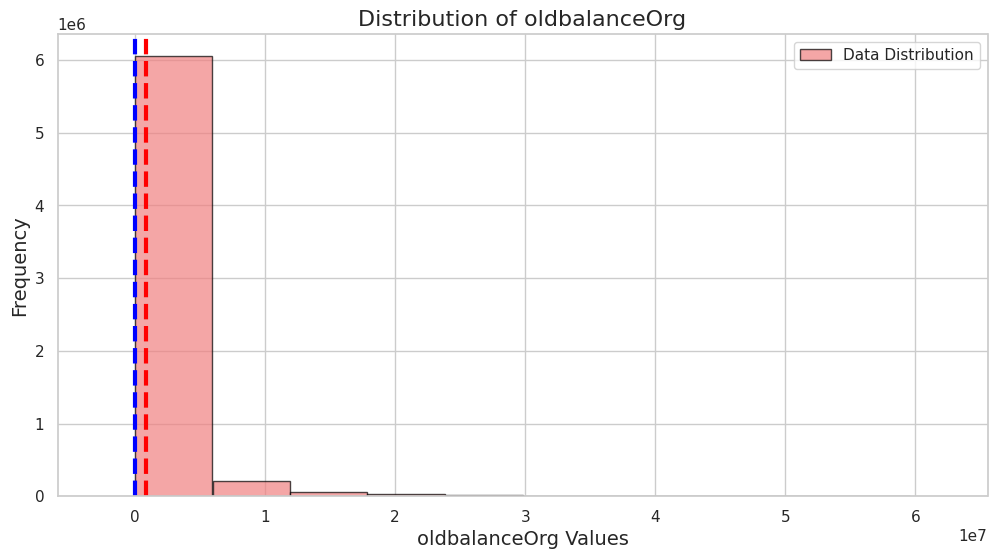

In [176]:
showPlot('oldbalanceOrg', bins=10, color='lightcoral')

By analyzing the 'oldbalanceOrg' feature, we can assess typical account balances and determine if there are any unusually large or small balances that might suggest suspicious behavior or anomalies in the transactions.

## **Visualizing the 'newbalanceOrig' Feature**

The **'newbalanceOrig'** feature represents the balance of the originating account after the transaction has been completed. This is an important feature as it shows the updated financial status of the originating account, reflecting the effect of the transaction on the account balance.

We use a histogram to visualize the distribution of **'newbalanceOrig'** values. **The histogram allows us to explore how the balances of originating accounts are distributed post-transaction and to identify any significant shifts or trends.**


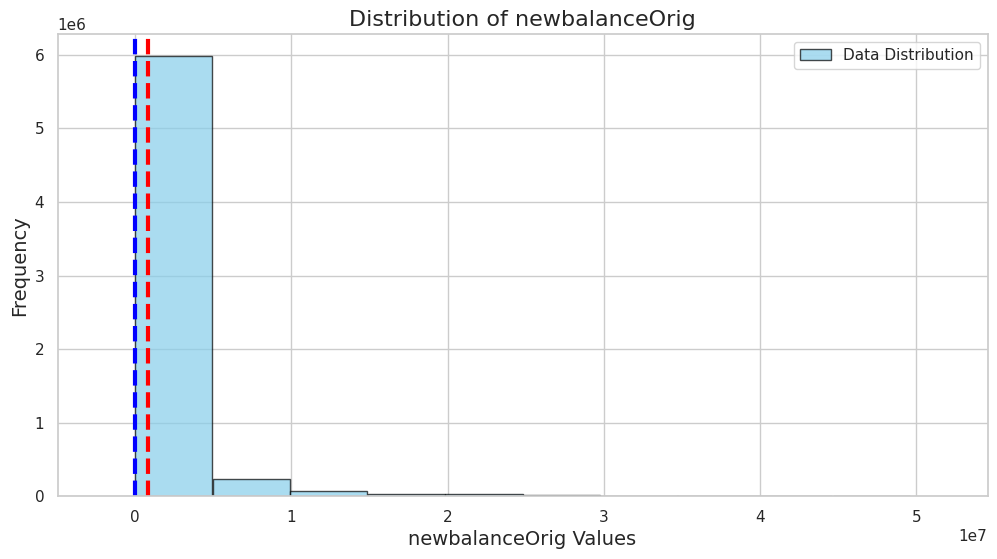

In [177]:
showPlot('newbalanceOrig', bins=10, color='skyblue')

By analyzing the 'newbalanceOrig' feature, we can determine if there are any unusually large or small balances after transactions, which could indicate irregular activity or unusual transaction patterns.

## **Visualizing the 'oldbalanceDest' Feature**

The **'oldbalanceDest'** feature represents the balance of the destination account before the transaction. This is an important feature as it provides context on the financial state of the recipient's account prior to receiving the transaction amount.

We use a histogram to visualize the distribution of **'oldbalanceDest'** values. **This helps us observe how the balances of destination accounts are distributed before transactions and can highlight any irregularities in the starting balance of recipient accounts.**


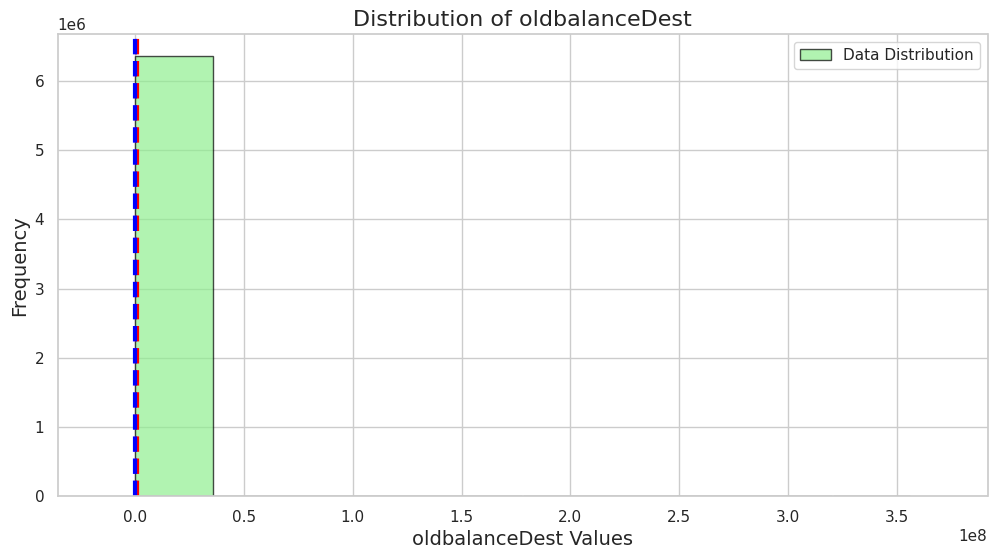

In [178]:
showPlot('oldbalanceDest', bins=10, color='lightgreen')

By analyzing the 'oldbalanceDest' feature, we can identify any significant differences in the balances of destination accounts prior to the transaction, which could be indicative of unusual patterns or suspicious behavior.

## **Visualizing the 'newbalanceDest' Feature**

The **'newbalanceDest'** feature represents the balance of the destination account after the transaction has been completed. This feature is significant because it shows how the balance of the recipient's account has changed following the transaction.

We use a histogram to visualize the distribution of **'newbalanceDest'** values. **This helps us observe how the destination account balances are distributed after receiving funds and can highlight any significant changes in the recipient's account.**


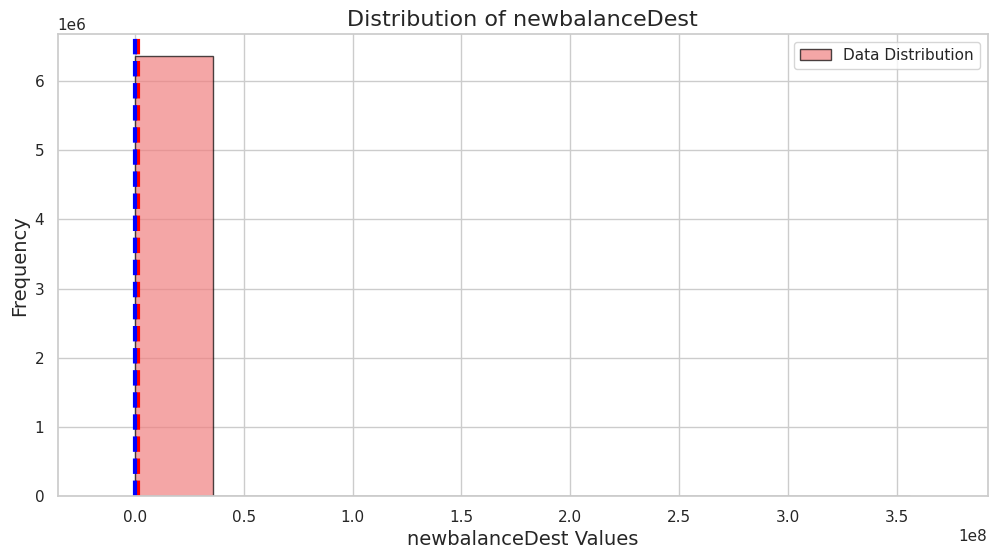

In [179]:
showPlot('newbalanceDest', bins=10, color='lightcoral')

By analyzing the 'newbalanceDest' feature, we can identify unusual patterns or discrepancies in the balance changes of destination accounts, which might indicate fraudulent activity or anomalies in the transaction process.

## **Handling Outliers with Quantile-Based Flooring and Capping**

In the dataset, we observe the presence of some **outliers** that may distort the analysis and modeling process. **Outliers are values that significantly deviate from the rest of the data**, and can adversely affect model performance. To address this, we will employ **Quantile-based Flooring and Capping**, a technique that involves adjusting extreme values by setting them to a defined upper or lower threshold.

### **What is Capping and Flooring?**

- **Capping**: This involves replacing values that exceed a predefined upper threshold with a maximum value, called the **Upper Control Limit (UCL)**. In our case, the UCL is determined by the **90th percentile** of the data. Any value greater than this threshold will be replaced with the value at the 90th percentile, limiting the influence of extreme high values (upper outliers).

- **Flooring**: This involves replacing values below a predefined lower threshold with a minimum value, called the **Lower Control Limit (LCL)**. Similarly, the LCL is set using the **10th percentile** of the data. Any value lower than this threshold will be replaced by the value at the 10th percentile, reducing the impact of extreme low values (lower outliers).

### **Why Use Percentiles for Flooring and Capping?**

The 90th and 10th percentiles are commonly used in this process to avoid the influence of extreme values while maintaining most of the data intact. By using quantiles, we ensure that the thresholds are data-driven and reflect the natural distribution of the feature. This approach helps us retain valuable information while minimizing the influence of outliers that may otherwise skew the results.

In summary, applying **Quantile-based Flooring and Capping** will help us:
- Handle extreme values in a controlled manner, preventing them from distorting the analysis.
- Ensure that the model performs better by reducing the noise caused by outliers.


In [15]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(df[i].quantile(0.10))
    print(df[i].quantile(0.90))
    print('\n')

amount
4501.3
365423.30900000007


oldbalanceOrg
0.0
1822508.289000007


newbalanceOrig
0.0
1970344.7930000005


oldbalanceDest
0.0
2914266.6690000016


newbalanceDest
0.0
3194869.671000002




To further improve the dataset and minimize the influence of outliers, we apply a **quantile-based flooring and capping technique** on a selected set of features. Outliers can distort the distribution of features and affect model accuracy. To address this, we replace values that fall outside the 10th and 90th percentiles, ensuring that extreme low and high values are bounded by these thresholds.

### **Features Being Processed:**
The following features are selected for outlier handling:
- **Amount**
- **Old Balance (Origin)**
- **New Balance (Origin)**
- **Old Balance (Destination)**
- **New Balance (Destination)**

### **Process Overview:**

1. **Lower Threshold (Flooring)**: We first calculate the 10th percentile (`lower`) for each feature. Any value below this threshold is replaced with the value at the 10th percentile, effectively **flooring** the lower outliers.
   
2. **Upper Threshold (Capping)**: Similarly, we calculate the 90th percentile (`upper`) for each feature. Any value above this threshold is replaced with the value at the 90th percentile, applying **capping** to the higher outliers.

3. **Skewness Check**: After handling the outliers, we print the **skewness** of each feature. Skewness measures the asymmetry of the data distribution. If the skewness value is close to 0, the data is approximately symmetric. This check allows us to ensure that the transformation improves the distribution towards normality.

### **Why This Approach?**

By applying **flooring** and **capping** based on percentiles, we effectively reduce the influence of extreme outliers while retaining the majority of the data. This helps in:
- **Improving model performance**: Outliers can distort machine learning models, leading to biased predictions. By controlling these extreme values, we ensure the model is trained on more representative data.
- **Stabilizing the feature distributions**: By limiting extreme values, we improve the symmetry of the data, which often results in better performance of algorithms that assume normality (e.g., linear models).

In the next steps, we will analyze the skewness values of the features to ensure the data distribution is balanced.

In [16]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




## **Visualizing the Data After Removing Outliers**

After applying the **quantile-based flooring and capping** method to handle the outliers, it's important to visualize the changes in the data to understand the impact of these adjustments.

By removing or adjusting extreme values (those below the 10th percentile or above the 90th percentile), we expect to see a more balanced distribution in the selected features. This helps in reducing the influence of outliers that might distort the analysis or modeling process.

### **What to Expect in the Visualization:**
1. **More Symmetric Distributions**: With the outliers removed or capped, the data should appear more symmetric, and the skewness of each feature should be reduced.
2. **More Consistent Range**: The range of values will be more consistent and won't include extreme values that could have a disproportionate effect on the analysis.
3. **Improved Model Performance**: By visualizing the adjusted data, we can better understand how these transformations will help improve the overall performance of machine learning models by reducing the noise caused by outliers.


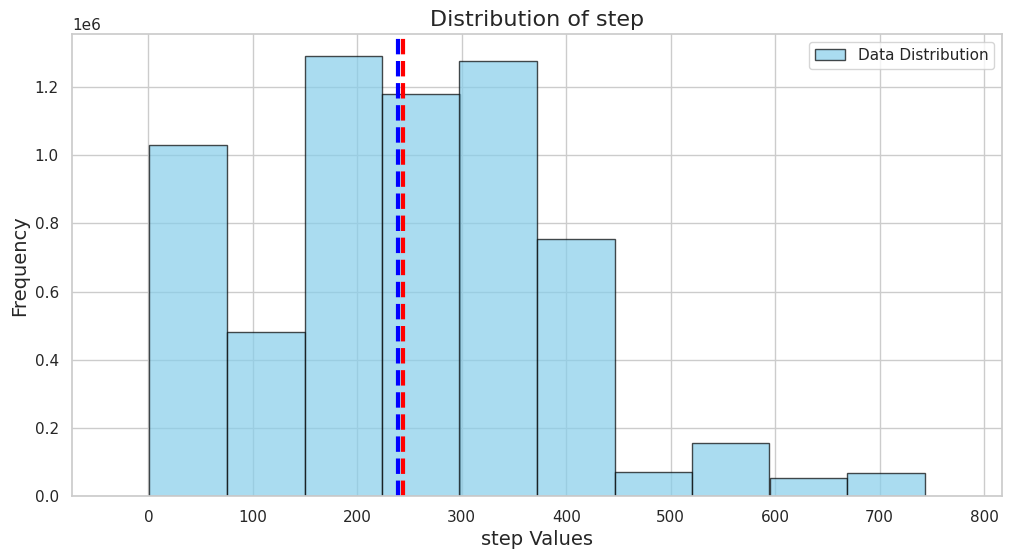

In [185]:
showPlot('step', bins=10, color='skyblue')

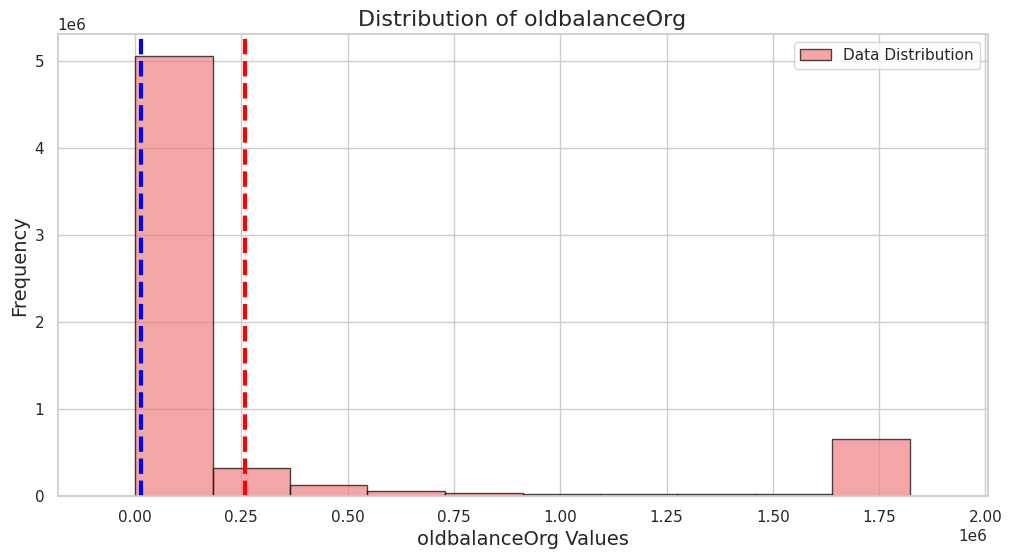

In [186]:
showPlot('oldbalanceOrg', bins=10, color='lightcoral')

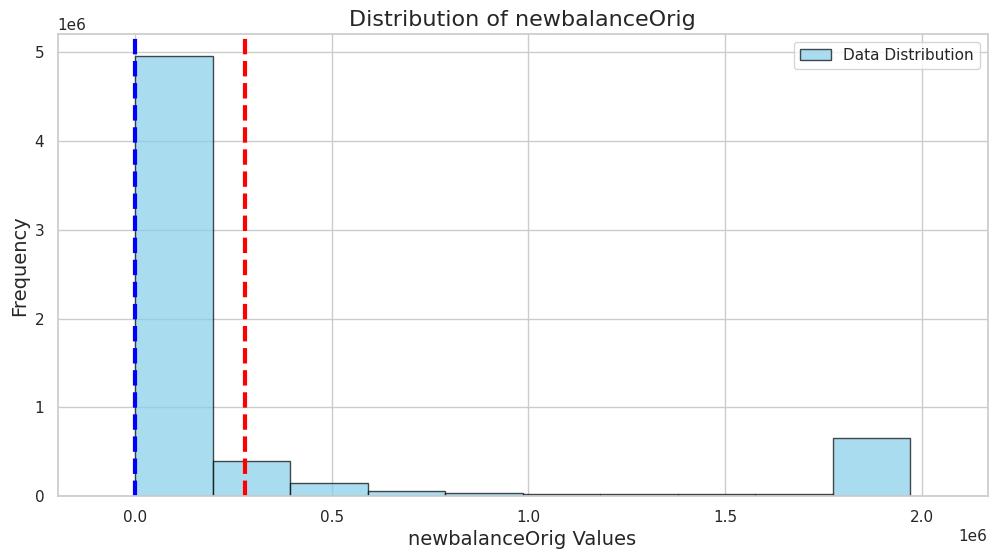

In [187]:
showPlot('newbalanceOrig', bins=10, color='skyblue')

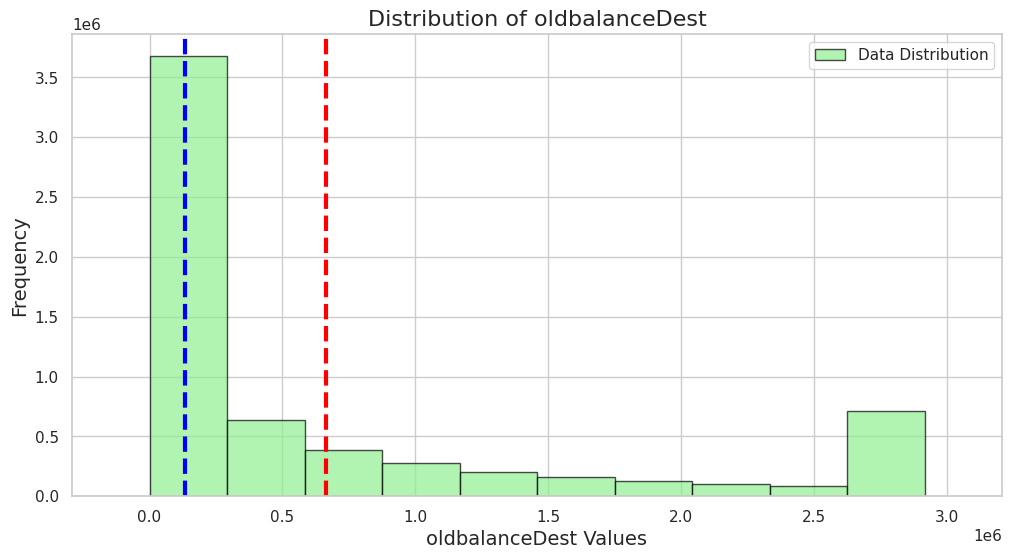

In [188]:
showPlot('oldbalanceDest', bins=10, color='lightgreen')

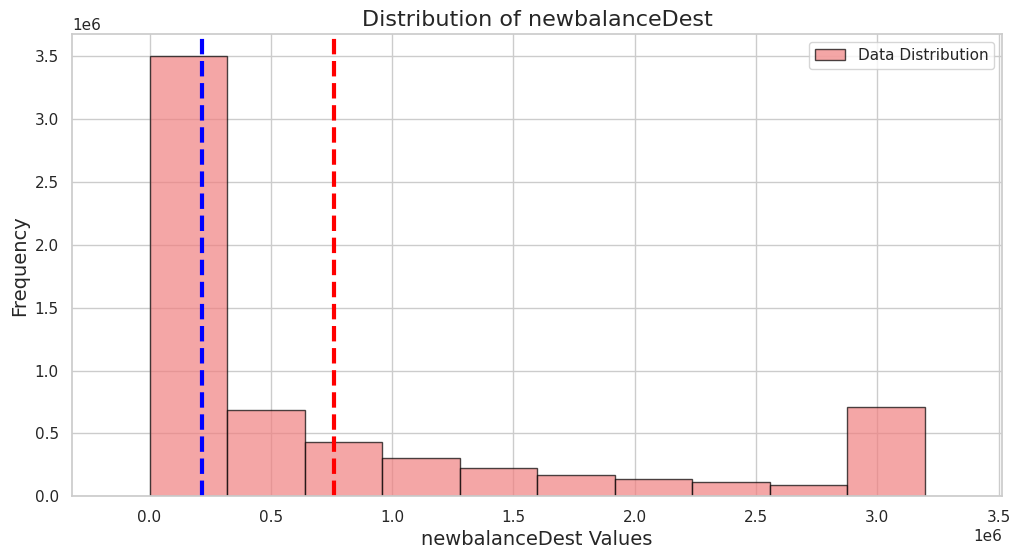

In [189]:
showPlot('newbalanceDest', bins=10, color='lightcoral')

After applying **capping and flooring** to handle outliers, the increased distance between the **mean** (red dashed line) and the **median** (blue dashed line) is an indicator that the outliers have been effectively adjusted or removed. This is beneficial for several reasons:

1. **More Accurate Representation of the Data**:
   - The **mean** is sensitive to extreme values (outliers). Before the adjustment, outliers could have pulled the mean towards them, making it less representative of the majority of the data. By applying capping (limiting higher values) and flooring (limiting lower values), we restrict the influence of extreme values, making the mean a more accurate measure of central tendency.
   - The **median**, on the other hand, is robust to outliers and remains relatively unchanged, even after the adjustment.

2. **Improved Data Symmetry**:
   - When the mean and median are closer together, it suggests a more symmetric distribution. With outliers removed or adjusted, the data distribution becomes more balanced, which is often desirable in machine learning models.
   - A more symmetric distribution ensures that models do not become biased by extreme values, leading to better predictions.

3. **Better Model Performance**:
   - Removing or limiting the impact of outliers results in a more stable and consistent dataset. This makes it easier for machine learning algorithms to learn meaningful patterns in the data, rather than being influenced by noise introduced by extreme values.
   - Models trained on datasets with fewer outliers are likely to be more accurate and generalize better to new, unseen data.

In summary, the increased distance between the mean and median after outlier removal indicates that the data has been adjusted for better accuracy and stability. This transformation helps to ensure that the dataset is more balanced and that the resulting machine learning models will be more reliable and robust.

### **Key Columns for Fraud Detection Analysis**

In this section, we will analyze several important columns in the dataset that are critical for understanding online payment fraud:

1. **type**: The type of transaction (e.g., PAYMENT, TRANSFER, etc.). This column provides insight into the transaction type and helps us identify patterns in different types of fraud.
   
2. **amount**: The monetary value of each transaction. Analyzing the amount will help us detect any unusually large or small transactions that could indicate fraudulent activity.

3. **nameDest**: The recipient of the transaction. This column can help us track the destination of funds and identify suspicious recipient patterns.

4. **isFraud**: A target variable indicating whether the transaction is fraudulent (1) or not (0). This is the main column we will use to build and evaluate the fraud detection model.

5. **isFlaggedFraud**: A binary indicator that flags transactions that have been flagged by the system as potentially fraudulent. This is useful for understanding the system's existing detection capabilities.

6. **step**: Represents a unit of time where each step equals one hour. This allows us to analyze transactions over time and detect any patterns or anomalies in the frequency or volume of transactions.

In the following analysis, we will first examine the **type** column to understand the distribution and patterns of different transaction types.


In [17]:
df.type

,type
0,PAYMENT
1,PAYMENT
2,TRANSFER
3,CASH_OUT
4,PAYMENT
...,...
6362615,CASH_OUT
6362616,TRANSFER
6362617,CASH_OUT
6362618,TRANSFER


### **Exploring Unique Transaction Types**

To better understand the different types of transactions in the dataset, we will use the `unique()` function on the **type** column. This will give us a list of all distinct transaction types present in the data.

Understanding these unique transaction types is crucial as different types of transactions may exhibit different patterns, some of which could be indicative of fraudulent activity. By analyzing these types, we can identify which transaction categories are more prone to fraud and adjust our detection strategies accordingly.

In [18]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

### **Transaction Type Distribution: Payment Transactions**

We will now examine the distribution of transaction types using the `value_counts()` function on the **type** column. Specifically, we are focusing on the number of **payment** transactions.

The output will provide a count of how many transactions fall into the "payment" category, helping us understand the prevalence of this type of transaction in the dataset. By analyzing the distribution of transaction types, we can better identify which types of transactions are most common and investigate their relationship with fraudulent activity.


In [19]:
payment = df.type.value_counts()
payment

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


### **Visualizing the Distribution of Transaction Types**

To better understand the distribution of transaction types, we will plot the counts of each type using a **horizontal bar chart**. The chart will visualize the different categories of transactions, highlighting how often each type occurs.


<Axes: ylabel='type'>

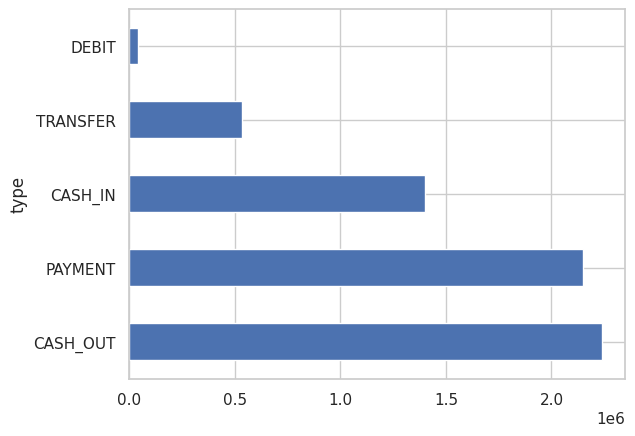

In [193]:
payment.plot(kind='barh')

As we have already observed, there are five distinct transaction types in the dataset. By using a horizontal bar plot, we can easily compare the frequency of each transaction type and identify any patterns that may emerge, such as whether certain types are more likely to be associated with fraudulent activity.

### **Visualizing Transaction Type Distribution with Countplot**

To further analyze the distribution of transaction types, we will use a **countplot** from Seaborn. This plot will show the frequency of each transaction type along the x-axis, providing a clear visual representation of how many transactions belong to each category.

<Axes: xlabel='type', ylabel='count'>

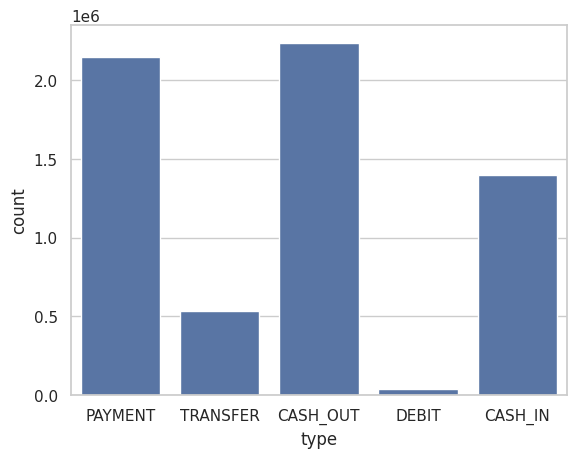

In [194]:
sns.countplot(x='type', data=df)

By visualizing the counts of each transaction type, we can easily identify any imbalances or patterns in the data. This can help inform our fraud detection strategy, as certain transaction types might be more susceptible to fraudulent activity.

### **Analyzing the Relationship Between Transaction Type and Fraud**

Next, we will explore the relationship between the **type** column (transaction type) and the **isFraud** column (fraud indicator). To do this, we'll use a **crosstab** to compute the frequency of fraudulent vs. non-fraudulent transactions for each transaction type.

The resulting crosstab will show how many fraudulent and non-fraudulent transactions occur within each transaction type. This analysis will help us identify if certain types of transactions are more likely to be associated with fraudulent activity.


In [20]:
CrosstabResult = pd.crosstab(index = df.type, columns = df.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


By understanding this relationship, we can better target fraud detection efforts based on transaction type, potentially leading to more effective fraud prevention strategies.

In [196]:
CrosstabResult[1]

,1
type,
CASH_IN,0
CASH_OUT,4116
DEBIT,0
PAYMENT,0
TRANSFER,4097


### **Visualizing the Relationship Between Transaction Type and Fraud with a Grouped Bar Chart**

To better understand the relationship between **transaction type** and **fraud occurrence**, we will plot a **grouped bar chart** using the crosstab result. This chart will display the counts of fraudulent vs. non-fraudulent transactions for each transaction type.

From the previous crosstab analysis, we observed that fraud is more likely to occur during **transfer** or **cashout** transactions. **However, the number of fraudulent transactions is relatively low compared to non-fraudulent ones**, and this discrepancy may not be visible in the plot.

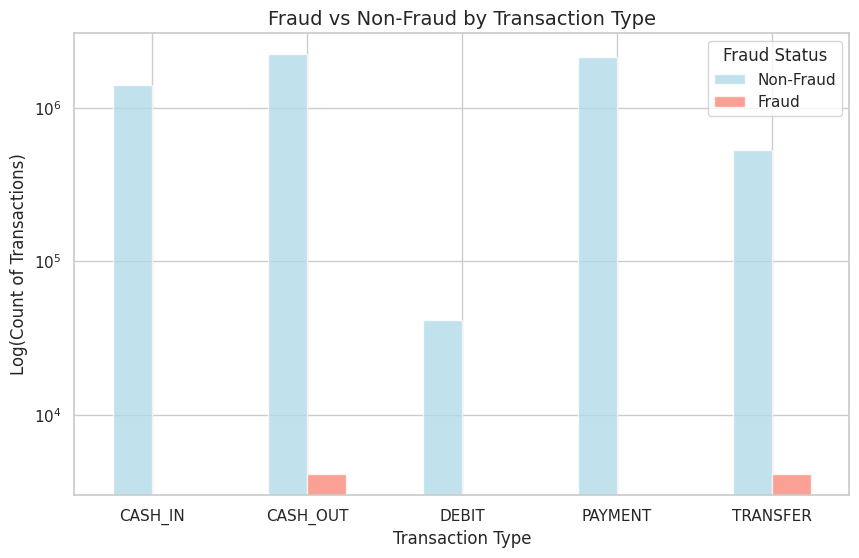

In [197]:
# Adjusting the plot for better visibility
CrosstabResult.plot.bar(figsize=(10, 6), rot=0, color=['lightblue', 'salmon'], alpha=0.75)

# Use logarithmic scale for better visibility of small values
plt.yscale('log')

# Adding labels and title
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Log(Count of Transactions)', fontsize=12)
plt.title('Fraud vs Non-Fraud by Transaction Type', fontsize=14)

# Adding a legend
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'])

# Show the plot
plt.show()

The grouped bar chart will allow us to visually compare the frequency of fraud for each transaction type, providing a clearer view of how fraud is distributed across different transaction categories.

### **Maximizing the Visibility of Fraudulent Transactions in a Grouped Bar Chart**

In this case, we will plot a **grouped bar chart** focusing specifically on the fraudulent transactions (i.e., `CrosstabResult[1]`), maximizing its visibility for better analysis. This adjustment will allow us to visualize the distribution of fraud occurrences across different transaction types more clearly.

The chart will highlight only the fraud-related data (indexed by `CrosstabResult[1]`), making it easier to identify the patterns and transaction types that are most frequently associated with fraud.


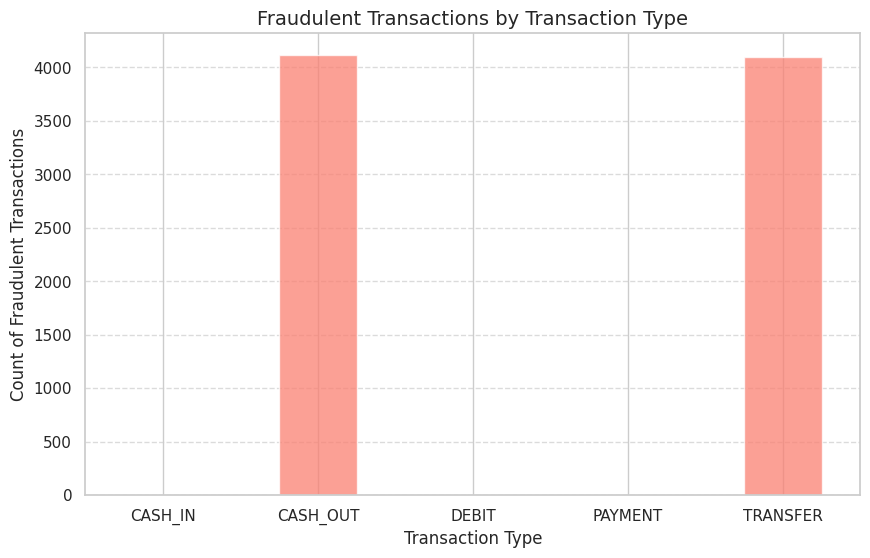

In [198]:
# Plotting the fraud data only, maximizing visibility
CrosstabResult[1].plot.bar(figsize=(10, 6), rot=0, color=['salmon'], alpha=0.75)

# Adding labels and title
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count of Fraudulent Transactions', fontsize=12)
plt.title('Fraudulent Transactions by Transaction Type', fontsize=14)

# Adding gridlines for better comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### **Improving the View of Fraudulent Transactions with a Customized Y-Axis Limit**

In this step, we are plotting a **grouped bar chart** between the **transaction type** and **fraud status** (`isFraud`). To enhance the visualization and focus on the values of fraud transactions, we will customize the **y-axis limits** using `plt.ylim([3500, 7000])`.

By adjusting the y-axis, we can zoom in on the range of fraudulent transactions, making it easier to analyze and compare the counts of fraud occurrences across different transaction types.


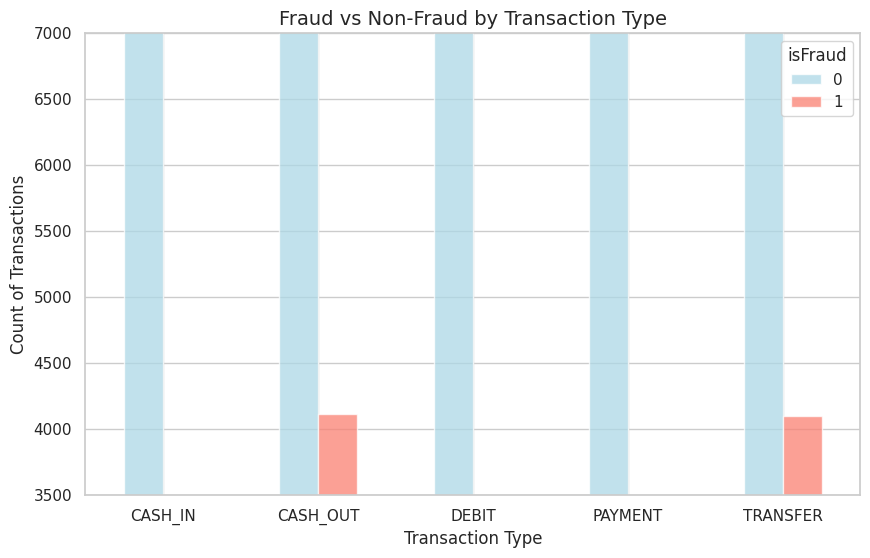

In [199]:
# Plotting the grouped bar chart with customized y-axis limit to focus on fraudulent transactions
CrosstabResult.plot.bar(figsize=(10, 6), rot=0, color=['lightblue', 'salmon'], alpha=0.75)

# Set the y-axis limit to zoom in on the range of interest (fraudulent transactions)
plt.ylim([3500, 7000])

# Adding labels and title
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count of Transactions', fontsize=12)
plt.title('Fraud vs Non-Fraud by Transaction Type', fontsize=14)

# Show the plot
plt.show()


This adjustment ensures that the differences in fraudulent transaction counts become more apparent and allows us to better observe the patterns related to fraud within the dataset.

### **Analyzing the Percentage of Fraud in Cashout and Transfer Transaction Types**

In this step, we aim to analyze the **percentage of fraud** that occurred specifically within the **cashout** and **transfer** transaction types. By examining the **CrosstabResult**, which provides the counts of fraudulent and non-fraudulent transactions for each transaction type, we can calculate the fraud percentage for these two types.

This analysis helps us understand which transaction types are more vulnerable to fraud, allowing for a more targeted approach in fraud detection strategies. Focusing on **cashout** and **transfer** types is essential, as these may be more susceptible to fraudulent activity due to the nature of the transactions (e.g., large sums of money being moved).

In [21]:
# Calculating the fraud percentage for 'cashout' and 'transfer' transaction types
cashout_fraud = CrosstabResult.loc['CASH_OUT', 1]  # Fraudulent cashout transactions
cashout_total = CrosstabResult.loc['CASH_OUT'].sum()  # Total cashout transactions
cashout_fraud_percentage = (cashout_fraud / cashout_total) * 100

transfer_fraud = CrosstabResult.loc['TRANSFER', 1]  # Fraudulent transfer transactions
transfer_total = CrosstabResult.loc['TRANSFER'].sum()  # Total transfer transactions
transfer_fraud_percentage = (transfer_fraud / transfer_total) * 100

# Displaying the fraud percentages
print(f"Fraud Percentage in Cashout Transactions: {cashout_fraud_percentage:.2f}%")
print(f"Fraud Percentage in Transfer Transactions: {transfer_fraud_percentage:.2f}%")

Fraud Percentage in Cashout Transactions: 0.18%
Fraud Percentage in Transfer Transactions: 0.77%


### **Calculating the Fraud Percentage for Cashout and Transfer Transaction Types**

In this section, we manually calculate the **fraud percentage** for the **cashout** and **transfer** transaction types. By using the raw transaction counts for both fraud and non-fraud transactions, we can compute the percentage of fraudulent transactions within each type.

Here’s the breakdown:
- For **cashout**, the total number of transactions is the sum of non-fraudulent (`2233384`) and fraudulent (`4116`) transactions. The **fraud percentage** for cashout transactions is calculated by dividing the number of fraudulent cashouts by the total cashouts and multiplying by 100.
- Similarly, for **transfer** transactions, the total number of transactions is the sum of non-fraudulent (`528812`) and fraudulent (`4097`) transactions. The **fraud percentage** for transfer transactions is computed in the same way.

The result of these calculations is as follows:

- **Cashout Fraud Percentage**: 0.184% — This indicates that only a very small fraction of **cashout** transactions are fraudulent.
- **Transfer Fraud Percentage**: 0.769% — Similarly, this suggests that the percentage of fraudulent transactions within the **transfer** type is also quite low.

Both fraud percentages are relatively low, which could indicate that while fraud exists, it is not prevalent in these transaction types.


In [201]:
cashout=2233384+4116
cashout_fraud= 4116/(cashout) * 100
cashout_fraud

0.18395530726256984

In [202]:
transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud

0.7687991758442811

### **Analyzing the Distribution of Transaction Amounts and its Relationship with Fraud**

In this section, we analyze the distribution of the **transaction amounts** and investigate its relationship with fraudulent transactions.

1. **Amount Distribution**:
   - We start by visualizing the distribution of the **amount** column using a **strip plot**. This plot shows individual data points for the transaction amounts, giving us an overview of the spread of the data.
   - We also print the **minimum** and **maximum** values in the `amount` column to better understand the range of transaction amounts.

   - The **lowest amount transaction** starts from **4500**, while the **highest amount transaction** reaches up to **3.6 lakh** (360,000).

2. **Relationship Between Amount and Fraud**:
   - We explore how the **amount** column correlates with **fraudulent transactions** by using a **boxplot**. This boxplot shows the distribution of the transaction amounts, separated by whether the transaction was fraudulent (`isFraud` column).
   - From the boxplot, we can observe the range of fraudulent transactions. It appears that fraudulent transactions typically range from **1.3 lakh to 3.6 lakh**, which is higher than the non-fraudulent transaction amounts.



In [203]:
df.amount

,amount
0,9839.6400
1,4501.3000
2,4501.3000
3,4501.3000
4,11668.1400
...,...
6362615,339682.1300
6362616,365423.2919
6362617,365423.2919
6362618,365423.2919


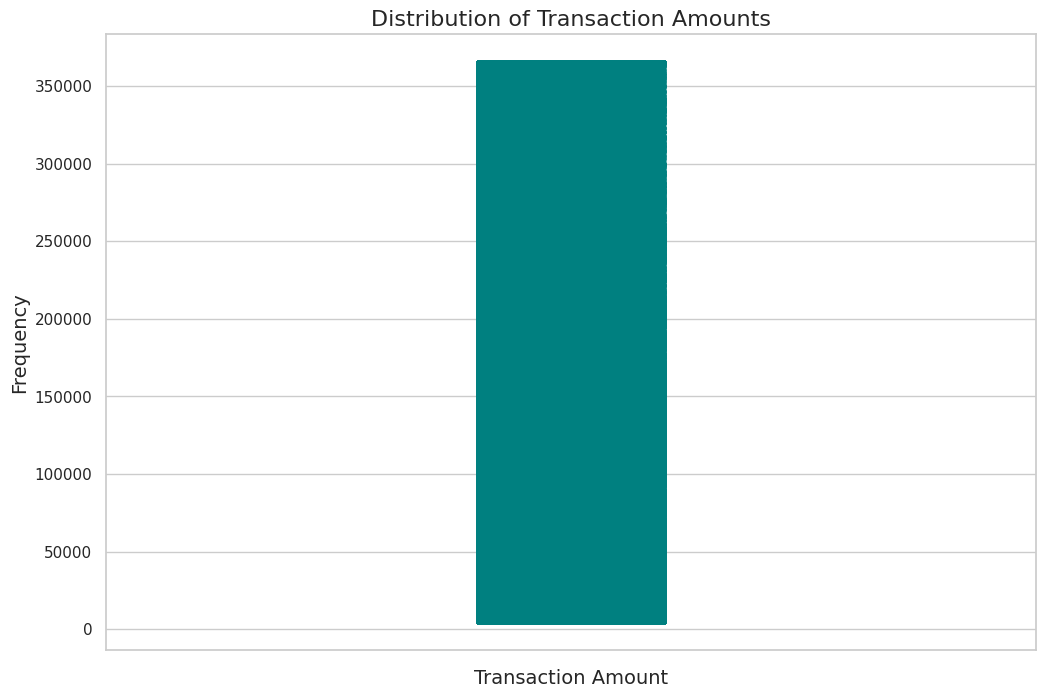

In [204]:
# Improved Strip Plot for Amount with customization
plt.figure(figsize=(12, 8))

# Set the style and color palette
sns.set(style="whitegrid")
sns.stripplot(y=df.amount, color='teal', jitter=True, size=3, edgecolor='black')

# Adding labels and title
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Transaction Amounts', fontsize=16)

# Displaying the plot
plt.show()

In [205]:
print('Minimum: ',df.amount.min())
print('Maximum: ',df.amount.max())

Minimum:  4501.3
Maximum:  365423.2919


<ipython-input-206-d1d530f025b2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=df, palette='Set2', showfliers=False, linewidth=2)


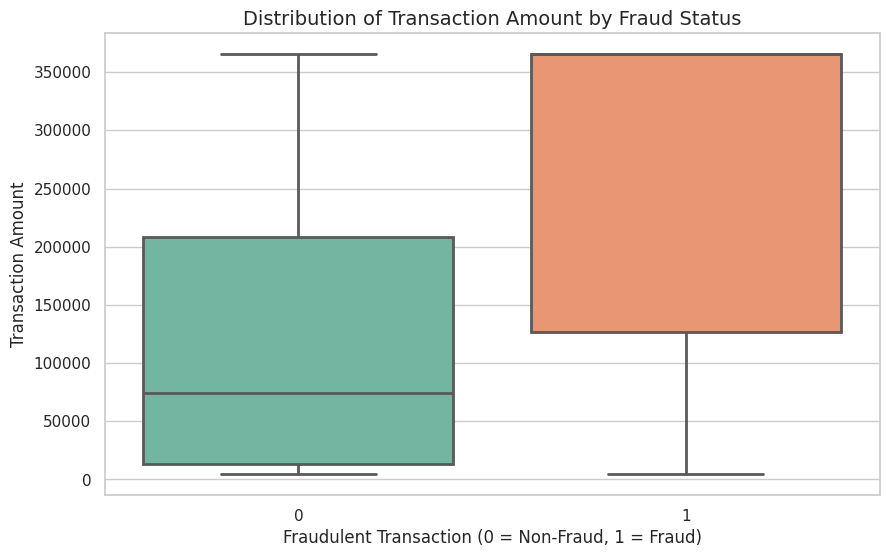

In [206]:
# Improved Boxplot for 'Amount' by 'isFraud' column
plt.figure(figsize=(10, 6))

# Set the style and color palette
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x='isFraud', y='amount', data=df, palette='Set2', showfliers=False, linewidth=2)

# Adding labels and title
plt.xlabel('Fraudulent Transaction (0 = Non-Fraud, 1 = Fraud)', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.title('Distribution of Transaction Amount by Fraud Status', fontsize=14)

# Displaying the plot
plt.show()

### Insights:
- The **range of amounts** is quite large, with values spanning from around **4500** to **360,000**.
- There seems to be a higher concentration of fraud in transactions with amounts ranging from **1.3 lakh to 3.6 lakh**, which could be an important factor for further fraud detection analysis.
- The boxplot visualization helps to identify how **fraudulent transactions** tend to involve higher amounts compared to **non-fraudulent** ones.

### **Analysis of Fraudulent Transactions**

We begin by calculating the **total number of transactions** and the **number of fraudulent transactions** in the dataset.

1. **Total Transactions**:
   The dataset contains a total of **6,362,620** transactions.

2. **Fraudulent Transactions**:
   Out of these total transactions, **8,213** transactions were flagged as fraudulent (**isFraud = 1**).

3. **Fraud Percentage**:
   The percentage of fraudulent transactions in the dataset is approximately **0.13%**, which is still a very low value, indicating that fraudulent transactions are relatively rare in this dataset.

4. **Fraudulent Transaction Amount**:
   Next, we analyze the **transaction amounts** for fraudulent transactions. The fraudulent transactions are sorted by amount in descending order, showing the highest value transactions first.

5. **Fraudulent Transaction Amount Distribution**:
   A histogram of the fraudulent transaction amounts reveals that the values are spread across different ranges, with a concentration in the higher end of the spectrum. This distribution can help to identify patterns in fraudulent transactions, such as common amounts that fraudsters tend to target.



In [207]:
total_transactions = df.shape[0]
fraud_transaction = df[df.isFraud==1].shape[0]
fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent

0.12908204481801522

In [208]:
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

Total transactions:  6362620
Total fraud transactions happened:  8213
Total fraud transaction percent:  0.13


In [209]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5188057,367,CASH_OUT,365423.2919,C1210833971,4.358672e+05,0.000000e+00,C363013236,186826.40,6.226936e+05,1,0
5990227,416,CASH_OUT,365423.2919,C2110305720,1.822507e+06,0.000000e+00,C225008798,523626.59,3.194869e+06,1,0
5990225,416,CASH_OUT,365423.2919,C246726057,1.822507e+06,0.000000e+00,C1786144514,2423749.18,3.194869e+06,1,0
5990224,416,TRANSFER,365423.2919,C298387535,1.822507e+06,1.970345e+06,C662194461,0.00,0.000000e+00,1,0
5988262,415,CASH_OUT,365423.2919,C2137951962,1.675153e+06,0.000000e+00,C309573869,12832.26,1.687986e+06,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6002113,428,CASH_OUT,4501.3000,C1838531308,3.037670e+03,0.000000e+00,C505532836,800854.71,8.038924e+05,1,0
6002112,428,TRANSFER,4501.3000,C1408814433,3.037670e+03,0.000000e+00,C944070846,0.00,0.000000e+00,1,0
1796322,162,TRANSFER,4501.3000,C1172437299,1.510000e+02,0.000000e+00,C315826176,0.00,0.000000e+00,1,0
1796323,162,CASH_OUT,4501.3000,C790340353,1.510000e+02,0.000000e+00,C517676411,386163.34,3.863143e+05,1,0


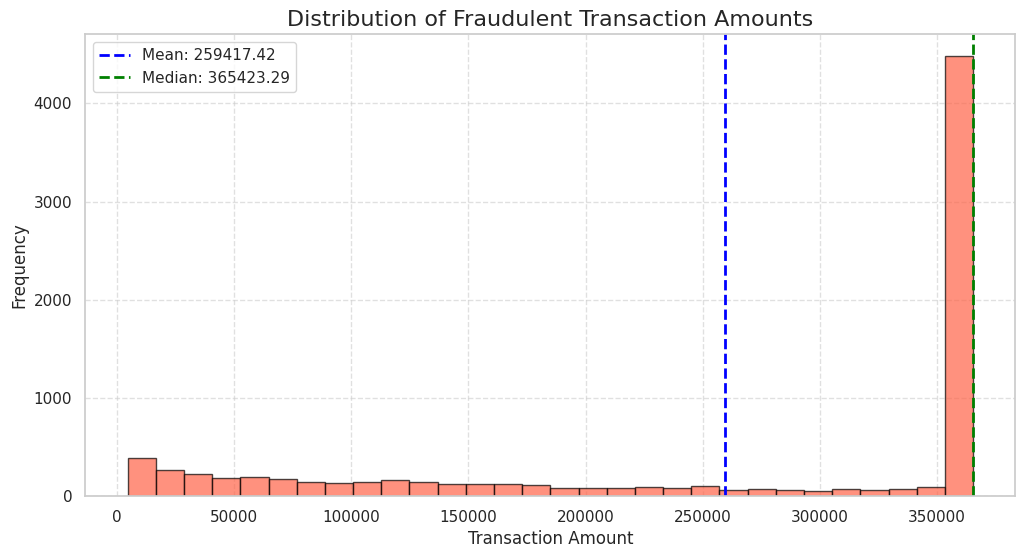

In [210]:
# Improved histogram plot
plt.figure(figsize=(12, 6))
plt.hist(fraud_amount['amount'], bins=30, color='tomato', edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('Distribution of Fraudulent Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Optional: Add a vertical line for the mean and median values
mean_value = fraud_amount['amount'].mean()
median_value = fraud_amount['amount'].median()
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# Show the legend
plt.legend()

# Display the plot
plt.show()

### Insights:
- The **fraud rate** is still very low, with only **0.13%** of transactions being fraudulent.
- **Fraudulent transactions** tend to occur more frequently in higher transaction value ranges.
- The histogram of fraudulent transaction amounts provides insights into the distribution, which can be useful for improving fraud detection systems, focusing on high-value transactions where fraud is more likely to occur.

This analysis highlights that fraudulent transactions are rare but tend to involve larger sums of money, which can inform strategies for detecting and preventing fraud in higher-value transactions.

### **Analysis of Flagged Fraud Transactions**

The `isFlaggedFraud` column indicates transactions that are **assumed to be fraudulent** based on the detection system, but not necessarily verified. Let’s examine the distribution of values in this column.

1. **Flagged Fraud Transactions**:
   The `isFlaggedFraud` column contains a value of **1** for transactions that have been assumed and flagged as fraud.

   Upon inspection of the data, we find that out of the total **6,362,604** records, only **16 transactions** have been flagged as fraudulent. This is an extremely low number, considering the large dataset.

2. **Actual Fraud vs Flagged Fraud**:
   When we compare this with the actual number of **fraudulent transactions** (where `isFraud = 1`), we see that **fraudulent transactions** are far more frequent than the **flagged transactions**. This discrepancy indicates that the **flagging system** is highly selective, and only a very small percentage of transactions are flagged, even though actual fraud occurs much more frequently.

In [211]:
df.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [212]:
flagged_fraud_records = df[(df.isFraud==1) & (df.isFlaggedFraud==1)]
flagged_fraud_records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,365423.2919,C728984460,1.822507e+06,1.970345e+06,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,365423.2919,C1100582606,1.343002e+06,1.343002e+06,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,365423.2919,C1035541766,5.366244e+05,5.366244e+05,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,365423.2919,C908544136,1.822507e+06,1.970345e+06,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,365423.2919,C689608084,1.822507e+06,1.970345e+06,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,365423.2919,C452586515,1.822507e+06,1.970345e+06,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,365423.2919,C193696150,1.822507e+06,1.970345e+06,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.2200,C1684585475,3.538742e+05,3.538742e+05,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,365423.2919,C786455622,1.822507e+06,1.970345e+06,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,365423.2919,C19004745,1.822507e+06,1.970345e+06,C1806199534,0.0,0.0,1,1


### Insights:
- The **isFlaggedFraud** column represents a **very small number** of transactions compared to actual fraud occurrences. Only **16** transactions are flagged, but there are many more fraudulent transactions.
- The **flagging system** is much stricter or more conservative, flagging only a tiny fraction of actual frauds.

This analysis highlights that the **isFlaggedFraud** column likely represents transactions that the fraud detection system assumed to be fraudulent based on certain criteria, but it might not reflect the actual incidence of fraud accurately. More comprehensive or sensitive detection systems might be required to flag fraudulent transactions more effectively.


### **Analysis of Flagged Fraud Transactions Accuracy**

In this section, we are evaluating how accurate the flagged fraud detection system is by comparing the number of fraud transactions that were flagged as fraudulent to the total number of actual fraudulent transactions.

1. **Flagged Fraud Accuracy**:
   We already know that **16 transactions** were flagged as fraudulent in the dataset, and we have **8,213 actual fraud transactions** in total.



In [213]:
total_fraud= df[df.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud

8213

In [214]:
total_isflaggedFraud= flagged_fraud_records.shape[0]
total_isflaggedFraud

16

2. **Percentage of Flagged Fraud**:
   To determine how effective the flagging system is, we calculate the percentage of fraud transactions that were correctly flagged. The percentage of flagged fraud can be calculated as:

   The result shows that only **0.195%** of the total fraud transactions were flagged.

In [215]:
flagged_percent = total_isflaggedFraud/total_fraud * 100
print('Percentage of flagged fraud: ',round(flagged_percent,3))

Percentage of flagged fraud:  0.195



3. **Percentage of Unflagged Fraud**:
   Next, we calculate the percentage of fraud transactions that were **not flagged**. This is the difference between total fraud transactions and the flagged fraud transactions, which represents the **unflagged fraud**:

   The result indicates that **99.805%** of fraud transactions were **not flagged**.

In [216]:
unflagged_percent= (total_fraud-total_isflaggedFraud)/total_fraud * 100
print('Percentage of incorrectly flagged fraud: ',round(unflagged_percent,3))

Percentage of incorrectly flagged fraud:  99.805


### Insights:
- The **percentage of fraud flagged as fraudulent** is **extremely low**, at **0.195%**, indicating that the fraud detection system is not very effective in identifying fraud.
- The **majority (99.805%)** of fraud transactions were **not flagged**, which suggests that the fraud detection system has significant limitations in identifying fraudulent transactions.

This suggests that the current fraud detection system is missing a large portion of fraudulent transactions, and improvements or more sensitive detection techniques are needed to flag fraud more effectively.

### **Analysis of Fraudster IDs (nameDest)**

In this section, we analyze the `nameDest` column, which represents the recipient of a transaction. We are particularly interested in identifying the most frequent "fraudster" IDs involved in fraudulent transactions.

1. **Frequency of Fraudster IDs**:
   We start by checking the frequency of each unique value in the `nameDest` column. This gives us the count of how many transactions each recipient (fraudster) was involved in.


In [217]:
fraudster= df.nameDest.value_counts()
fraudster

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M1470027725,1
M1330329251,1
M1784358659,1



2. **Top 10 Fraudster IDs**:
   Since the dataset contains a large number of unique values for `nameDest`, we'll focus on the **top 10 fraudster IDs** to identify which recipients are most frequently associated with fraudulent transactions.

   The **top 10 fraudster IDs** are obtained by selecting the first 10 values from the sorted frequency distribution of `nameDest`.


In [218]:
fraudster[:10]

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
C1590550415,101
C451111351,99
C1789550256,99
C1360767589,98


3. **Visualization**:
   To visualize the most frequent fraudster IDs, we plot a **horizontal bar chart** to display the number of occurrences for each fraudster. This gives a clear view of the fraudster distribution based on the number of transactions they are involved in.

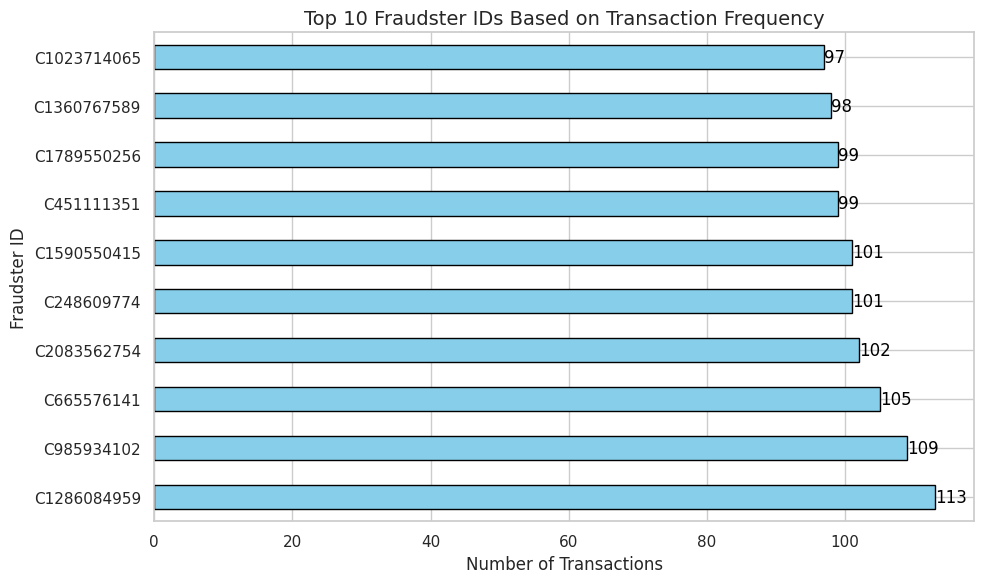

In [219]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Plot horizontal bar chart with custom color
fraudster[:10].plot(kind='barh', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Top 10 Fraudster IDs Based on Transaction Frequency', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Fraudster ID', fontsize=12)

# Display the value on the bars
for index, value in enumerate(fraudster[:10]):
    plt.text(value, index, str(value), va='center', fontsize=12, color='black')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Insights:
- The **top 10 fraudster IDs** represent the most frequent recipients involved in fraudulent transactions.
- The bar chart provides a clear visualization of the distribution, helping to identify which recipients are involved in the largest number of fraudulent activities.

By analyzing the fraudster distribution, we can target specific fraudster IDs for closer scrutiny or investigation.

### Distribution of Step

In this section, we explore the distribution of the "step" feature, which represents a unit of time where each step corresponds to one hour. This feature plays a critical role in understanding the temporal sequence of the transactions.

We can observe that the distribution of the "step" feature is concentrated between 150 and 400, indicating that most of the transactions occur within this time range. By visualizing this distribution, we can better understand the frequency and pattern of events that occur during different time frames.


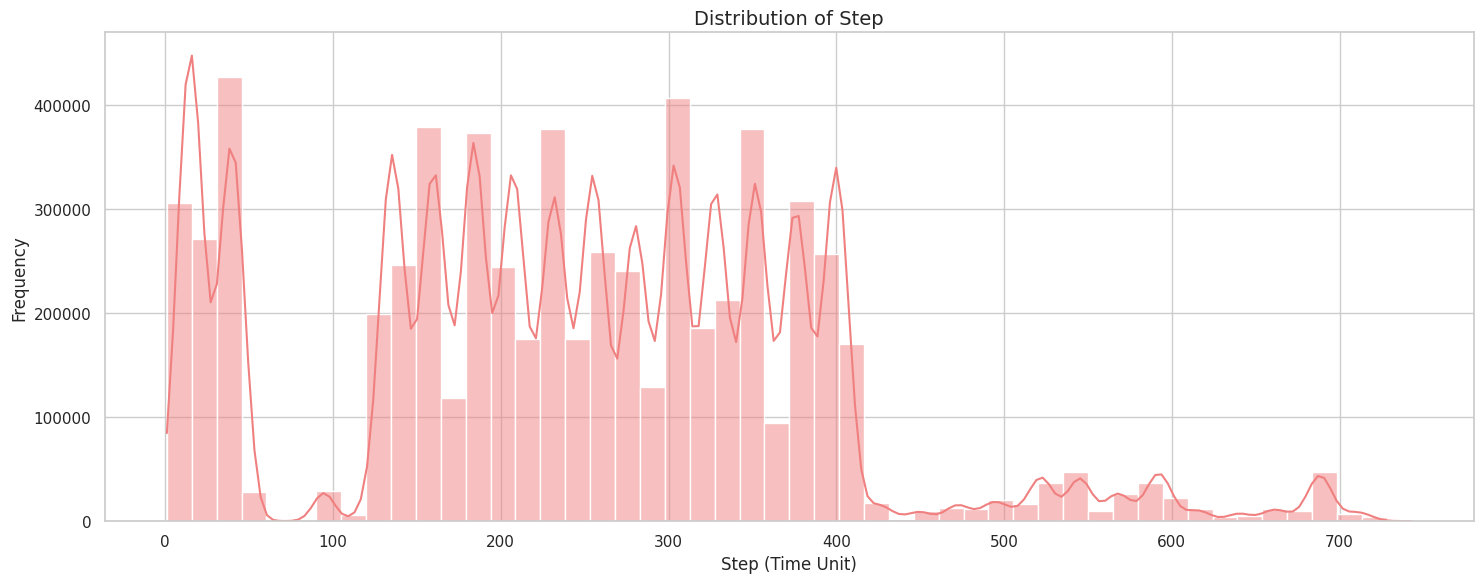

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 6))

# Plot the distribution using sns.histplot
sns.histplot(df['step'], bins=50, color='lightcoral', kde=True)

# Add title and labels
plt.title('Distribution of Step', fontsize=14)
plt.xlabel('Step (Time Unit)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Correlation between Features

In this section, we analyze the correlation between various features in the dataset using a correlation matrix. Correlation analysis helps identify relationships between different variables, which can be valuable in feature selection and understanding the dependencies between them.

From the correlation heatmap, we observe the following:
- **High Correlation between `newbalanceOrig` and `oldbalanceOrg`**: This indicates that the balance before and after the transaction for the origin account is closely related.
- **High Correlation between `newbalanceDest` and `oldbalanceDest`**: Similar to the origin account, the destination account also shows a strong relationship between its balance before and after the transaction.
- **Moderate Correlation between `amount` and `newbalanceDest` and between `amount` and `oldbalanceDest`**: The transaction amount shows a relatively high correlation with the destination account balances, both before and after the transaction.

These insights can help in understanding the financial flows between accounts and how transaction amounts are related to the balances in the origin and destination accounts, which could be useful in identifying patterns associated with fraud.


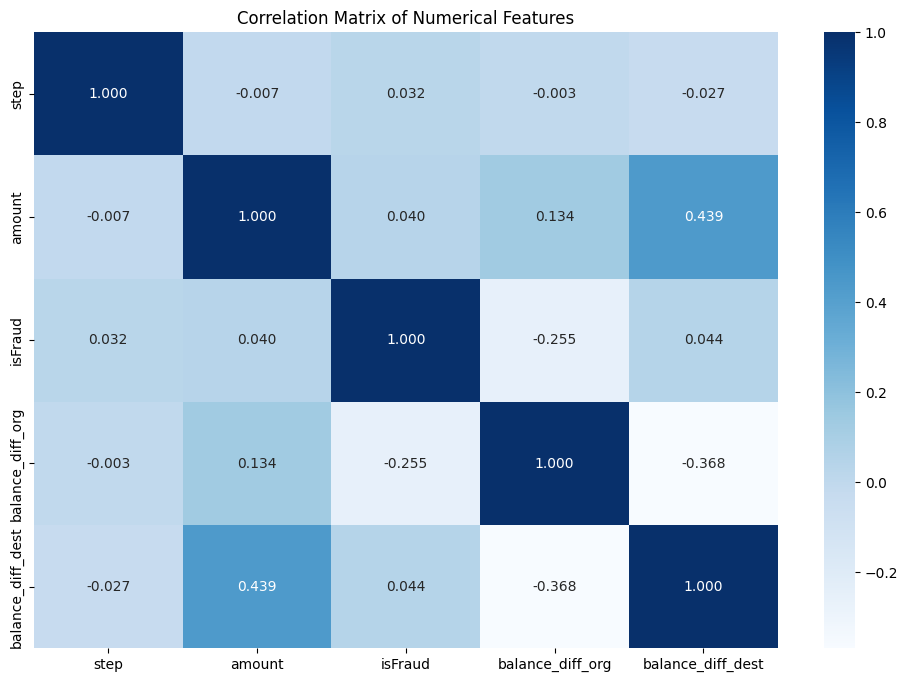

In [35]:
df_plot = df.select_dtypes(include=['float64', 'int64'])
corr = df_plot.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues', fmt=".3f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


The histogram and the Kernel Density Estimate (KDE) curve help visualize the density and spread of transaction steps, which may be useful for further analysis of temporal patterns in fraud detection. Understanding the behavior of transactions over time could reveal important insights into fraud patterns or transaction anomalies.

### Key Insights from the Data Analysis

1. **Fraud Percentage in Total Transactions**:
   - A total of **8,213 fraud transactions** occurred, accounting for approximately **0.13%** of the entire dataset.

2. **Fraud Distribution by Transaction Type**:
   - Fraud predominantly occurred in the **cashout** and **transfer** transaction types.
   - **0.183%** of fraud was linked to the cashout type, and **0.769%** occurred in the transfer mode.

3. **Effectiveness of Fraud Flagging (isFlaggedFraud)**:
   - Only **16 records** out of **63 lakh** were flagged as fraud, representing a minimal **0.195%** of the total fraud transactions, indicating low fraud detection through this flag.

4. **Rate of Incorrectly Flagged Transactions**:
   - A significant portion of fraud transactions were misclassified, with **99.805%** of the fraud being flagged as non-fraudulent (0), amounting to around **8,197 incorrect flags**.

5. **Accuracy of Flagged Fraud Transactions**:
   - The **16 records** that were flagged as fraud were indeed correct, showing a high accuracy in fraud detection for these specific cases.

6. **Fraudulent Transaction Amount Ranges**:
   - Fraudulent transactions ranged from **1.3 lakh to 3.6 lakh**, with the highest concentration occurring between **340,000 and 360,000**.

### Final Conclusion and Recommendations:

- **Improvement Needed in Fraud Detection**: The analysis reveals that a large number of fraud transactions remain unflagged, while many transactions are incorrectly flagged as non-fraudulent. This points to the need for improving fraud detection algorithms to reduce misclassification and ensure better identification of fraudulent activities.

- **Targeted Fraudulent Amounts**: Fraudsters tend to target higher-value transactions, particularly in the range of **1-4 lakh**, which represents a substantial sum of money. This highlights the need to focus fraud detection efforts on such higher-value transactions.

- **Fraud Mode Patterns**: Fraud is most prevalent in **cashout** and **transfer** modes, with a relatively low occurrence of fraud in **payment** mode transactions. This suggests that fraud prevention measures should focus on these modes.

- **Limited Contribution of Some Features**: While features like **oldbalanceOrg**, **newbalanceOrig**, **nameDest**, **oldbalanceDest**, and **newbalanceDest** exhibited high correlations, they did not significantly contribute to fraud detection. Future efforts should focus on refining these features to extract more actionable insights.


# Approach for Fraud Detection: Fully Connected Neural Network (DNN) as the Optimal Solution

After conducting a thorough Exploratory Data Analysis (EDA), we've identified a large volume of transactions, with a small percentage of frauds (approximately 0.13%). The task is to predict whether a transaction is fraudulent or not, which is a **binary classification problem**. Despite the imbalanced data with a high proportion of legitimate transactions compared to frauds, we've identified important features that can help improve the model’s predictive ability, such as transaction amount and previous and subsequent balances.

After considering various modeling approaches, **we are convinced that a Fully Connected Neural Network (DNN)** is the most suitable approach for this problem due to the following reasons:

## Justification for Using a DNN

### 1. High Complexity and Non-Linearity of the Problem
- **Interrelated and non-linear features**: Throughout the EDA, we've seen that certain features like `amount`, `oldbalanceOrg`, `newbalanceOrig` have significant correlations, but the relationship between these features and fraud is complex and not necessarily linear. Neural networks, especially DNNs, excel at learning **non-linear** relationships between features.
  
- **Ability to learn complex representations**: DNNs can capture complex, non-linear relationships between features, which is a key advantage over simpler models like decision trees or linear models.

### 2. Large Dataset Size
- **Large volume of data**: With over 6 million records, a DNN can leverage the size of the dataset to learn meaningful representations. Simpler models may lack the capacity to capture all the information contained in this large dataset.
  
- **Generalization and regularization**: DNNs, if designed with techniques such as **dropout** and **regularization**, can avoid overfitting and generalize well to unseen data, even with such a large dataset.

### 3. Class Imbalance and Regularization Techniques
- **Class imbalance**: Although fraud represents only 0.13% of transactions, neural networks provide several ways to address class imbalance. We can use **class weighting** or techniques like **oversampling (SMOTE)** or **undersampling** to balance the dataset. Additionally, DNNs adapt better than other models when these techniques are applied.
  
- **Regularization techniques**: DNNs can be trained using techniques like **dropout**, **batch normalization**, and **early stopping**, which allow them to generalize better and avoid overfitting, especially with a large dataset.

### 4. Ability to Model Complex Relationships Between Variables
- **Feature interaction**: DNNs have a unique ability to capture implicit interactions between features, which is crucial in this kind of problem. For example, the relationship between the transaction amount and account balances (`oldbalance` and `newbalance`) is key to fraud prediction, and neural networks are ideal for modeling these complex interactions.

### 5. Scalability
- **Model scalability**: As the dataset continues to grow, neural networks can be trained efficiently and at scale, using techniques like **distributed training** or **GPU training** to accommodate the increasing data.

## Dataset Preparation for Training

### 1. Data Cleaning:
- **Imputation of missing values**: While there don't appear to be significant missing values in the dataset, any missing values should be handled before feeding the model. Imputation can be done using mean, median, or more advanced techniques depending on the type of variable.



In [22]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Impute numerical columns with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Impute categorical columns with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Check again for missing values to ensure all have been imputed
missing_values_after_imputation = df.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after_imputation)

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Missing Values After Imputation:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


- **Removing irrelevant features**: During EDA, we identified that some features like `nameDest` may not be useful or may contain too many unique values. These should either be removed or properly transformed.

In [23]:
# Drop 'nameDest' and 'nameOrig' columns as they have high cardinality and are not useful for fraud detection
df.drop(columns=['nameDest', 'nameOrig'], inplace=True)

# 'isFlaggedFraud' is not useful and is highly imbalanced, so we drop it
df.drop(columns=['isFlaggedFraud'], inplace=True)

# Create new features for balance differences instead of using old and new balance columns
df['balance_diff_org'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Drop original balance columns as their information is now captured in the balance_diff_* columns
df.drop(columns=['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], inplace=True)

# Display remaining columns for confirmation
print("Remaining columns after cleaning:", df.columns)


Remaining columns after cleaning: Index(['step', 'type', 'amount', 'isFraud', 'balance_diff_org',
       'balance_diff_dest'],
      dtype='object')


* **Remove:** nameDest, nameOrig, and isFlaggedFraud due to their low predictive value and high cardinality.
* **Keep and transform:** oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest by calculating the balance differences.
* **Retain:** step, type, amount, and isFraud as they are key to detecting fraud patterns.

### 2. Encoding Categorical Variables:
- **One-Hot Encoding**: For categorical variables like `type`, we will apply **One-Hot Encoding** to convert them into binary variables, which the neural network can process efficiently.


In [24]:
# Apply One-Hot Encoding to the 'type' column
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

# Display the first few rows to confirm the encoding
print(df_encoded.head())

   step    amount  isFraud  balance_diff_org  balance_diff_dest  \
0   1.0   9839.64      0.0          -9839.64                0.0   
1   1.0   4501.30      0.0          -1864.28                0.0   
2   1.0   4501.30      1.0           -181.00                0.0   
3   1.0   4501.30      1.0           -181.00           -21182.0   
4   1.0  11668.14      0.0         -11668.14                0.0   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0          False       False          True          False  
1          False       False          True          False  
2          False       False         False           True  
3           True       False         False          False  
4          False       False          True          False  


### 3. Scaling Numerical Features:
- Numerical features such as `amount`, `balance_diff_org`, `balance_diff_dest`, etc., must be **normalized** or **scaled** to ensure they are within a similar range (e.g., between 0 and 1). This helps the model learn faster and more accurately.

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to be scaled (these are the numerical columns we decided to keep)
numerical_columns = ['amount', 'balance_diff_org', 'balance_diff_dest']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows to confirm the scaling
print(df_encoded.head())


   step    amount  isFraud  balance_diff_org  balance_diff_dest  \
0   1.0  0.014791      0.0          0.631301           0.477034   
1   1.0  0.000000      0.0          0.634079           0.477034   
2   1.0  0.000000      1.0          0.634665           0.477034   
3   1.0  0.000000      1.0          0.634665           0.473567   
4   1.0  0.019857      0.0          0.630664           0.477034   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0          False       False          True          False  
1          False       False          True          False  
2          False       False         False           True  
3           True       False         False          False  
4          False       False          True          False  


### 4. Handling Class Imbalance:
- Given that fraud accounts for only 0.13% of the total transactions, it is crucial to address the class imbalance. We can:
  - **Oversample** the minority class (fraud) using techniques like **SMOTE (Synthetic Minority Over-sampling Technique)**.
  - **Weight the classes** in the loss function of the neural network, giving more importance to the fraud class so that the model doesn't bias towards the majority class.

In [26]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df_encoded.drop(columns=['isFraud'])  # drop target column
y = df_encoded['isFraud']  # target column

# Initialize SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to the data
X_res, y_res = smote.fit_resample(X, y)

# Verify the new distribution of the classes
print('Class distribution after SMOTE: ', y_res.value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after SMOTE:  isFraud
0.0    6354407
1.0    6354407
Name: count, dtype: int64


### 5. Data Splitting:
- The dataset will be split into **training (80%)**, **validation (10%)**, and **test (10%)** sets. This ensures that we can fine-tune the model using the validation set without affecting the final evaluation, which will be done using the test set.

In [27]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Further split the 20% temporary data into validation and test sets (50% of 20% for each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the shape of the splits and the class distribution for each set
print(f"Training set shape: {X_train.shape}, Class distribution: {y_train.value_counts()}")
print(f"Validation set shape: {X_val.shape}, Class distribution: {y_val.value_counts()}")
print(f"Test set shape: {X_test.shape}, Class distribution: {y_test.value_counts()}")

Training set shape: (10167051, 8), Class distribution: isFraud
1.0    5083526
0.0    5083525
Name: count, dtype: int64
Validation set shape: (1270881, 8), Class distribution: isFraud
0.0    635441
1.0    635440
Name: count, dtype: int64
Test set shape: (1270882, 8), Class distribution: isFraud
0.0    635441
1.0    635441
Name: count, dtype: int64


### Neural Network Architecture

The architecture of a Dense Neural Network (DNN) for fraud detection is designed to efficiently learn patterns in the data, especially in the case of imbalanced datasets, like the one for fraud detection. Here’s the reasoning behind the chosen architecture:

#### 1. **Input Layer**
   - The input layer has as many neurons as the number of features in the dataset. In this case, each feature represents a different aspect of the transaction, such as the transaction amount, the type of transaction, the old and new balances, and other relevant characteristics.
   - The input layer uses a **ReLU (Rectified Linear Unit)** activation function, which is commonly used because it introduces non-linearity and allows the network to model complex patterns. It is also computationally efficient, which helps the training process.

#### 2. **Hidden Layers**
   - **Number of Hidden Layers**: The network includes two to three hidden layers. This is sufficient for many classification tasks where patterns might not be linearly separable. The complexity of the model increases as the number of layers increases, so we avoid adding too many layers without proper justification.
   - **Neurons per Hidden Layer**: Each hidden layer starts with 128 neurons, which is a common choice to provide enough capacity for the network to capture complex relationships in the data. As we move deeper into the network, the number of neurons decreases (e.g., 64, 32). This approach allows the network to focus on the most important features at each subsequent layer, preventing overfitting and making the model more generalized.
   - **Activation Function**: **ReLU** is used in the hidden layers as well. It is one of the most widely used activation functions due to its simplicity and effectiveness in training deep neural networks. It helps mitigate the vanishing gradient problem and allows the model to learn efficiently.
   - **Dropout Layers**: Dropout is applied in each hidden layer with a rate of 0.2. Dropout randomly disables 20% of the neurons during each training step, which helps prevent overfitting. This is particularly useful in preventing the model from memorizing the training data, ensuring it generalizes well to unseen data.

#### 3. **Output Layer**
   - The output layer has a single neuron because this is a **binary classification** problem (fraud or non-fraud).
   - The **sigmoid activation function** is used in the output layer, as it converts the raw output into a probability value between 0 and 1. This allows the model to predict the likelihood of a transaction being fraudulent.

#### 4. **Loss Function and Optimizer**
   - **Loss Function**: **Binary Cross-Entropy** is used because we are dealing with binary classification. This loss function calculates the difference between the predicted probability and the actual label (fraud or non-fraud).
   - **Optimizer**: **Adam** is chosen as the optimizer. Adam is an efficient optimization algorithm that adapts the learning rate during training, making it well-suited for deep learning tasks. It’s widely used due to its efficiency and ability to handle sparse gradients.

#### 5. **Regularization and Overfitting**
   - **Dropout** and **regularization** are applied to prevent the model from overfitting, which can be a major issue when dealing with imbalanced datasets. By randomly "dropping out" neurons during training, the model is forced to learn more generalized patterns rather than memorizing the training data.
   - The number of hidden layers and neurons per layer is optimized to balance model complexity and training time. Too many layers or neurons can lead to overfitting, especially with limited data.

#### 6. **Class Imbalance Handling**
   - Given the highly imbalanced nature of the fraud detection problem (fraud transactions make up only a small percentage of the total transactions), the model incorporates strategies such as **class weighting** in the loss function or **SMOTE** (Synthetic Minority Over-sampling Technique) to ensure that the model pays more attention to the minority class (fraudulent transactions).



In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Initialize the Neural Network model
model = Sequential()

# Input Layer (First Hidden Layer)
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Additional Hidden Layers
model.add(Dense(64, activation='relu'))  # Second Hidden Layer
model.add(Dropout(0.2))  # Dropout layer for regularization

model.add(Dense(32, activation='relu'))  # Third Hidden Layer
model.add(Dropout(0.2))  # Dropout layer for regularization

# Output Layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model to verify architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

This architecture is designed to strike a balance between model complexity, computational efficiency, and overfitting prevention. The combination of hidden layers with ReLU activation, dropout regularization, and a sigmoid output function ensures the model can effectively classify fraudulent transactions while handling the challenges of class imbalance and large datasets.

### Model Training with Early Stopping

Training a neural network can often lead to overfitting, especially when working with limited data or imbalanced datasets. **Early Stopping** is a technique used during training to stop the process once the model’s performance on the validation set starts to deteriorate, thus preventing overfitting. In this section, we explain how Early Stopping can be applied during the training of our model.

#### **Why Use Early Stopping?**
   - **Overfitting Prevention**: In deep learning, the model may start memorizing the training data, especially after a certain number of epochs. Early stopping halts training when the model’s performance on a validation set stops improving.
   - **Saving Resources**: Training deep neural networks can be computationally expensive and time-consuming. By using early stopping, we avoid unnecessary epochs once the model has learned the patterns in the data, saving computational resources.
   - **Improved Generalization**: By stopping training at the point of optimal validation accuracy, we ensure the model generalizes better on unseen data, reducing the chance of overfitting to the training data.


In [30]:
from keras.callbacks import EarlyStopping

# Initialize the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=2,         # Stop after 2 epochs of no improvement
    restore_best_weights=True  # Restore the model weights from the epoch with the best validation loss
)

# Train the model with the early stopping callback
history = model.fit(
    X_train, y_train,        # Training data
    epochs=5,              # Maximum number of epochs
    batch_size=32,           # Batch size
    validation_data=(X_val, y_val),  # Validation data
    callbacks=[early_stopping],   # Apply the early stopping callback
    verbose=1                # Show training progress
)

# The model will stop early if the validation loss doesn't improve for 2 consecutive epochs

Epoch 1/5
317721/317721 ━━━━━━━━━━━━━━━━━━━━ 856s 3ms/step - accuracy: 0.9348 - loss: 0.1580 - val_accuracy: 0.9548 - val_loss: 0.1275
Epoch 2/5
317721/317721 ━━━━━━━━━━━━━━━━━━━━ 893s 3ms/step - accuracy: 0.9386 - loss: 0.1495 - val_accuracy: 0.9504 - val_loss: 0.1307
Epoch 3/5
317721/317721 ━━━━━━━━━━━━━━━━━━━━ 913s 3ms/step - accuracy: 0.9413 - loss: 0.1433 - val_accuracy: 0.9177 - val_loss: 0.1705


Using **Early Stopping** ensures that the model is trained optimally without overfitting, leading to better generalization performance on unseen data. This is especially important in fraud detection tasks where the balance between fraud and non-fraud transactions is skewed, and it is essential to avoid both underfitting and overfitting.

### Model Evaluation: Classification Report and Confusion Matrix

Once the model has been trained, the next crucial step is to evaluate its performance on the test set. This helps us understand how well the model generalizes to unseen data, especially in the context of fraud detection, where class imbalance is a key challenge.

#### **1. Generating Predictions**
The **model's predictions** are generated by predicting the test data, which outputs probabilities for each class (fraud or non-fraud). A threshold of 0.5 is applied to convert these probabilities into binary labels (1 for fraud, 0 for non-fraud). This step ensures the model provides clear decision outputs that can be further analyzed.

#### **2. Classification Report**
The **Classification Report** provides a detailed analysis of the model's performance for each class. Key metrics provided in the classification report include:

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall**: The ratio of correctly predicted positive observations to all actual positives.
- **F1-Score**: The harmonic mean of precision and recall, providing a balance between the two.
- **Support**: The number of occurrences of each class in the test set.

These metrics help us understand how well the model is performing, especially in detecting fraud.

#### **3. Confusion Matrix**
The **Confusion Matrix** summarizes the model's performance by showing the following values:

- **True Positives (TP)**: Correctly predicted fraud transactions.
- **False Positives (FP)**: Non-fraud transactions incorrectly predicted as fraud.
- **True Negatives (TN)**: Correctly predicted non-fraud transactions.
- **False Negatives (FN)**: Fraud transactions incorrectly predicted as non-fraud.

This matrix helps visualize how well the model distinguishes between fraud and non-fraud transactions. It’s essential for understanding the model’s performance, especially when dealing with imbalanced datasets.


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary labels

# Generate Classification Report
report = classification_report(y_test, y_pred, output_dict=True)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate classification report
print("Classification Report:\n", report)

# Generate confusion matrix
print("Confusion Matrix:\n", cm)

39716/39716 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step
Classification Report:
 {'0.0': {'precision': 0.9755327052419116, 'recall': 0.934025346176907, 'f1-score': 0.9543279106319518, 'support': 635441.0}, '1.0': {'precision': 0.9367178985566313, 'recall': 0.9765737495691968, 'f1-score': 0.9562307046895838, 'support': 635441.0}, 'accuracy': 0.9552995478730519, 'macro avg': {'precision': 0.9561253018992715, 'recall': 0.9552995478730519, 'f1-score': 0.9552793076607677, 'support': 1270882.0}, 'weighted avg': {'precision': 0.9561253018992714, 'recall': 0.9552995478730519, 'f1-score': 0.9552793076607679, 'support': 1270882.0}}
Confusion Matrix:
 [[593518  41923]
 [ 14886 620555]]


### Model Evaluation: Classification Report & Confusion Matrix

#### **Classification Report:**
The classification report provides key metrics for both the non-fraud ("0.0") and fraud ("1.0") classes, as well as overall accuracy and averages:

**Metrics for class "0.0" (Non-Fraud):**
- **Precision**: 0.9755 – The model correctly predicted 97.55% of the non-fraud transactions as non-fraud.
- **Recall**: 0.9340 – The model identified 93.40% of the actual non-fraud transactions.
- **F1-score**: 0.9543 – A balanced metric combining precision and recall, indicating good performance for non-fraud detection.

**Metrics for class "1.0" (Fraud):**
- **Precision**: 0.9367 – The model correctly predicted 93.67% of the fraud transactions as fraud.
- **Recall**: 0.9766 – The model identified 97.66% of the actual fraud transactions.
- **F1-score**: 0.9562 – A strong balance between precision and recall for fraud detection.

**Overall Metrics:**
- **Accuracy**: 0.9553 – The model correctly predicted 95.53% of all transactions (both fraud and non-fraud).
- **Macro Average**: Average of precision, recall, and F1-score for both classes:
  - **Precision**: 0.9561
  - **Recall**: 0.9553
  - **F1-score**: 0.9553
- **Weighted Average**: The average, weighted by the number of instances in each class:
  - **Precision**: 0.9561
  - **Recall**: 0.9553
  - **F1-score**: 0.9553

#### **Confusion Matrix:**

The confusion matrix provides a breakdown of the model's predictions:

- **True Negatives (TN)**: 593,518 – Non-fraud transactions correctly identified as non-fraud.
- **False Positives (FP)**: 41,923 – Non-fraud transactions incorrectly labeled as fraud.
- **False Negatives (FN)**: 14,886 – Fraud transactions incorrectly labeled as non-fraud.
- **True Positives (TP)**: 620,555 – Fraud transactions correctly identified as fraud.

#### **Key Insights:**
1. **Precision for Fraud (Class 1.0)**: The model achieves **high precision** for detecting fraud (93.67%), meaning that when the model predicts fraud, it is highly likely to be correct.
   
2. **Recall for Fraud (Class 1.0)**: The model shows **very high recall** for fraud (97.66%), correctly identifying most fraudulent transactions, minimizing false negatives.

3. **Accuracy**: The model demonstrates **high accuracy** of 95.53%, indicating that it correctly predicts the majority of transactions.

4. **Class Imbalance Impact**: Despite the significant imbalance between fraud and non-fraud transactions, the model performs well in identifying both classes, with especially high recall for fraud. The use of techniques like SMOTE helped mitigate the effects of class imbalance.

5. **False Positives**: There are 41,923 non-fraud transactions incorrectly identified as fraud. While this number is substantial, it is much lower than the true positives, suggesting that the model is relatively cautious in labeling non-fraud transactions as fraud.

6. **False Negatives**: There are 14,886 fraud transactions misclassified as non-fraud. Although fewer than the false positives, these represent missed fraud cases, which could be problematic in a real-world fraud detection scenario.

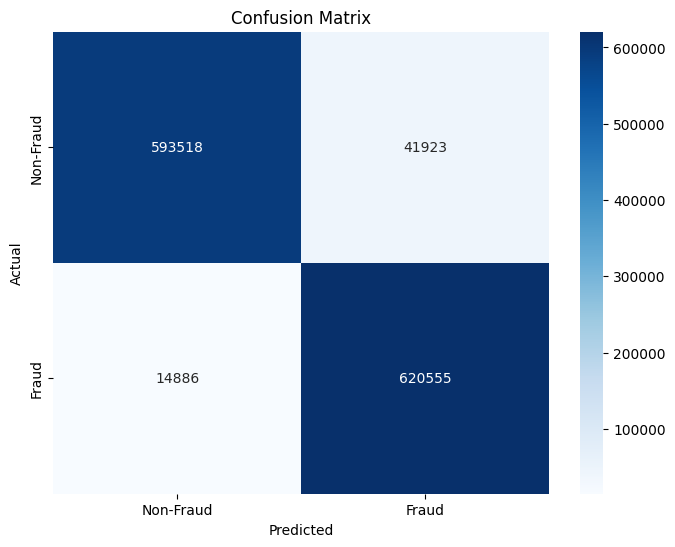

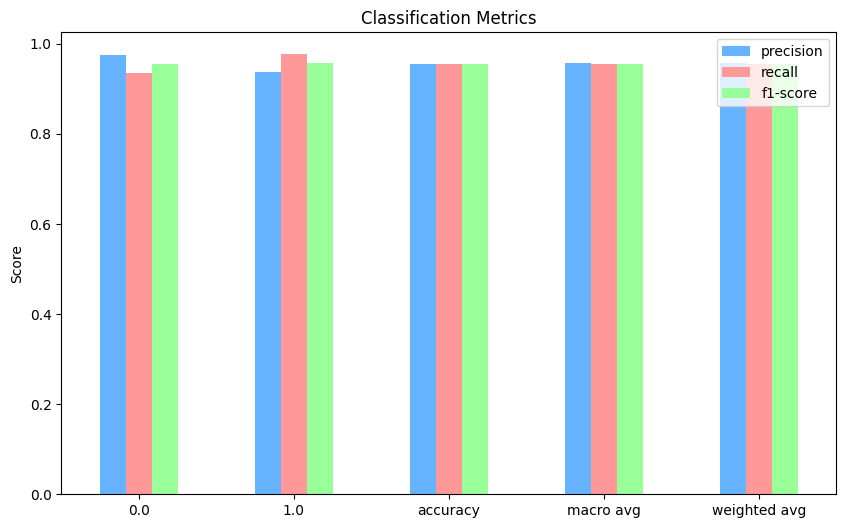

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Extract precision, recall, and F1 score from the report
metrics = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score for each class
metrics[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), color=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('Classification Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

#### **Summary:**
- The model performs exceptionally well in detecting fraudulent transactions, with high precision and recall for both fraud and non-fraud classes.
- While some false positives and false negatives exist, the model is effective at identifying fraud with high recall, making it a reliable tool for fraud detection.
- **High recall** for fraud detection is a critical strength, ensuring that most fraudulent transactions are captured by the model.

## Save the Trained Model and Weights


In [34]:
# Define the file paths for saving the model and weights
model_path = 'trained_model/model.h5'
weights_path = 'trained_model/.weights.h5'

# Save the trained model architecture (model structure + weights)
model.save(model_path)

# Save the trained model weights separately
model.save_weights(weights_path)

print(f"Model and weights have been saved successfully!\n")
print(f"Model saved at: {model_path}")
print(f"Weights saved at: {weights_path}")

Model and weights have been saved successfully!

Model saved at: trained_model/model.h5
Weights saved at: trained_model/.weights.h5
